In [1]:
library(dplyr)
library(ggplot2)
library(RColorBrewer)
library(gridExtra)
library(magrittr)
library(stringr)
library(tools)
library(patchwork)


Attaching package: 'dplyr'


The following objects are masked from 'package:stats':

    filter, lag


The following objects are masked from 'package:base':

    intersect, setdiff, setequal, union



Attaching package: 'gridExtra'


The following object is masked from 'package:dplyr':

    combine




In [2]:
options(repr.plot.width = 12, repr.plot.height = 8)

In [3]:
plot_biases <- function(data, n_sim, effect) {
  data_ggp <- data.frame(x = seq(n_sim),
                         y = c(data[, 1], data[, 2], data[, 3], data[, 4]),
                         estimator = c(
                             rep("g-comp", n_sim),
                             rep("IPTW", n_sim),
                             rep("TMLE", n_sim),
                             rep("one-step", n_sim)
                          )
                        )
  p <- ggplot(data_ggp, aes(x, y, fill = estimator)) +
    geom_boxplot() +
    geom_hline(yintercept = 0, linetype = "dashed",
               color = ifelse(!str_detect(effect, "complexe"), "black", NA),
               size = 1) +
    ggtitle(ifelse(!str_detect(effect, "complexe"),
                   paste0("Biais sur ", effect, " où n = ", n_sim, sep = ""),
                   paste0(effect, " où n = ", n_sim, sep = ""))) +
    theme(plot.title = element_text(size = 16, hjust = 0.5),
          legend.title = element_text(size = 14, face = "bold"),
          legend.text = element_text(size = 13))
  print(p)
}

In [4]:
n_sims <- c(100, 250, 500, 750, 1000)

## Données de base

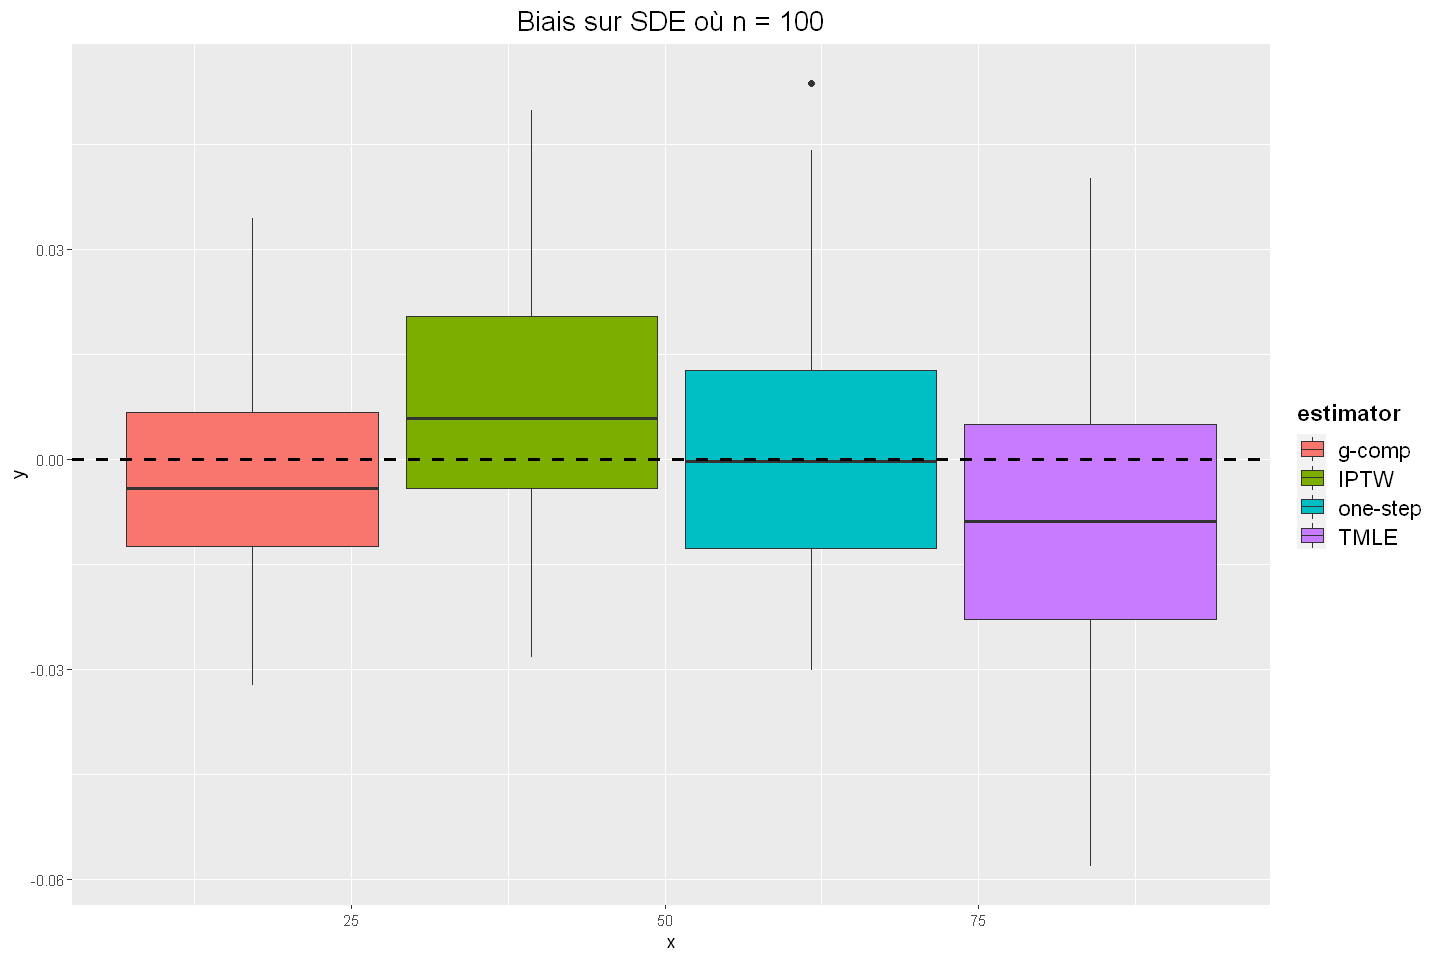

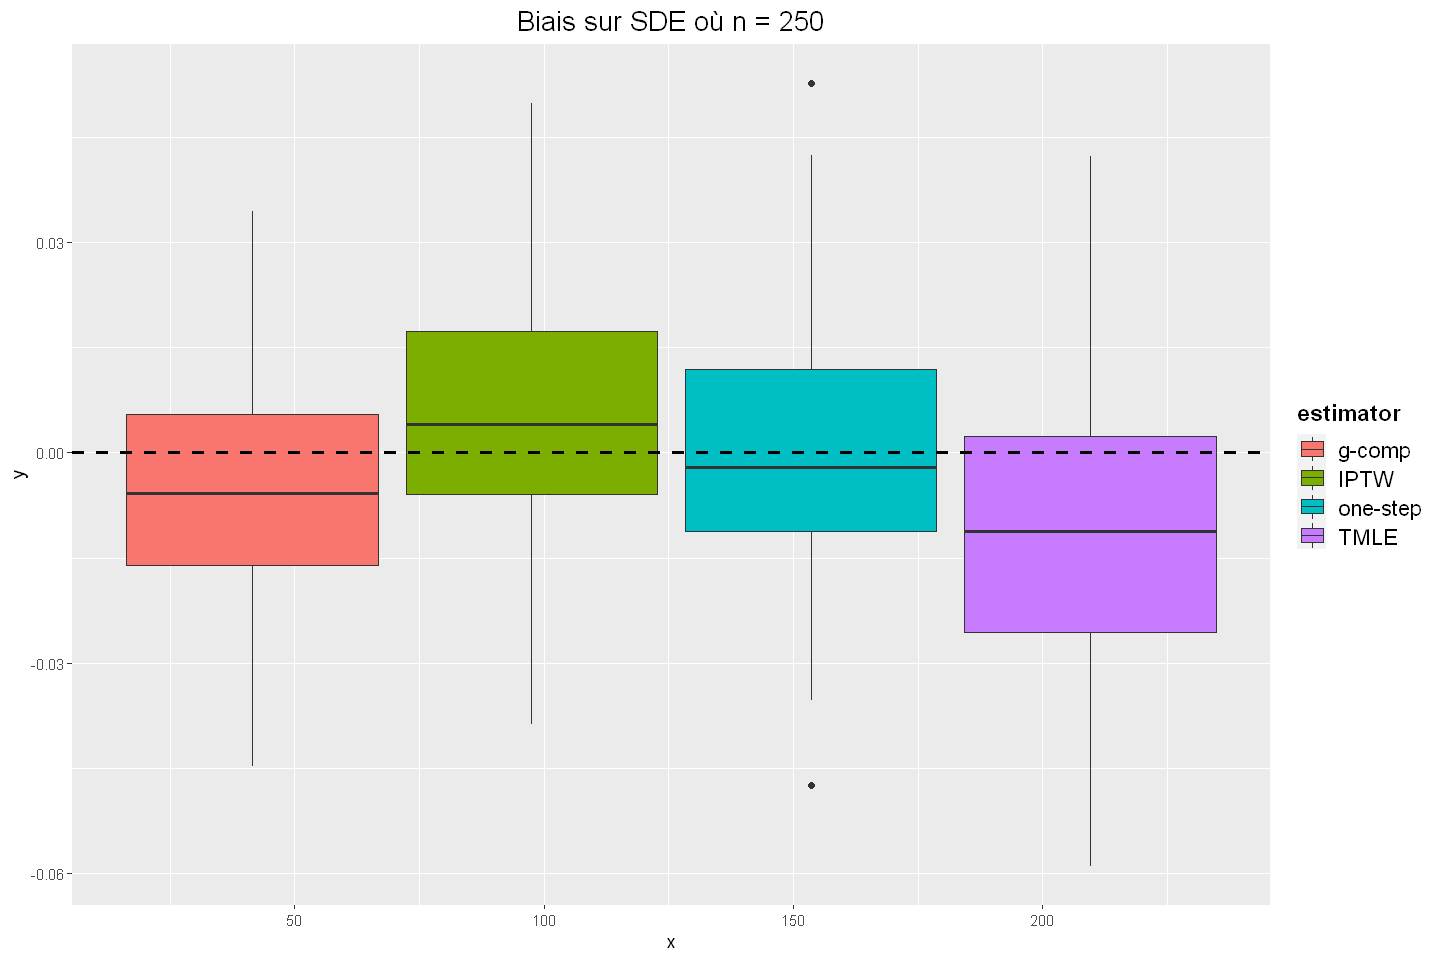

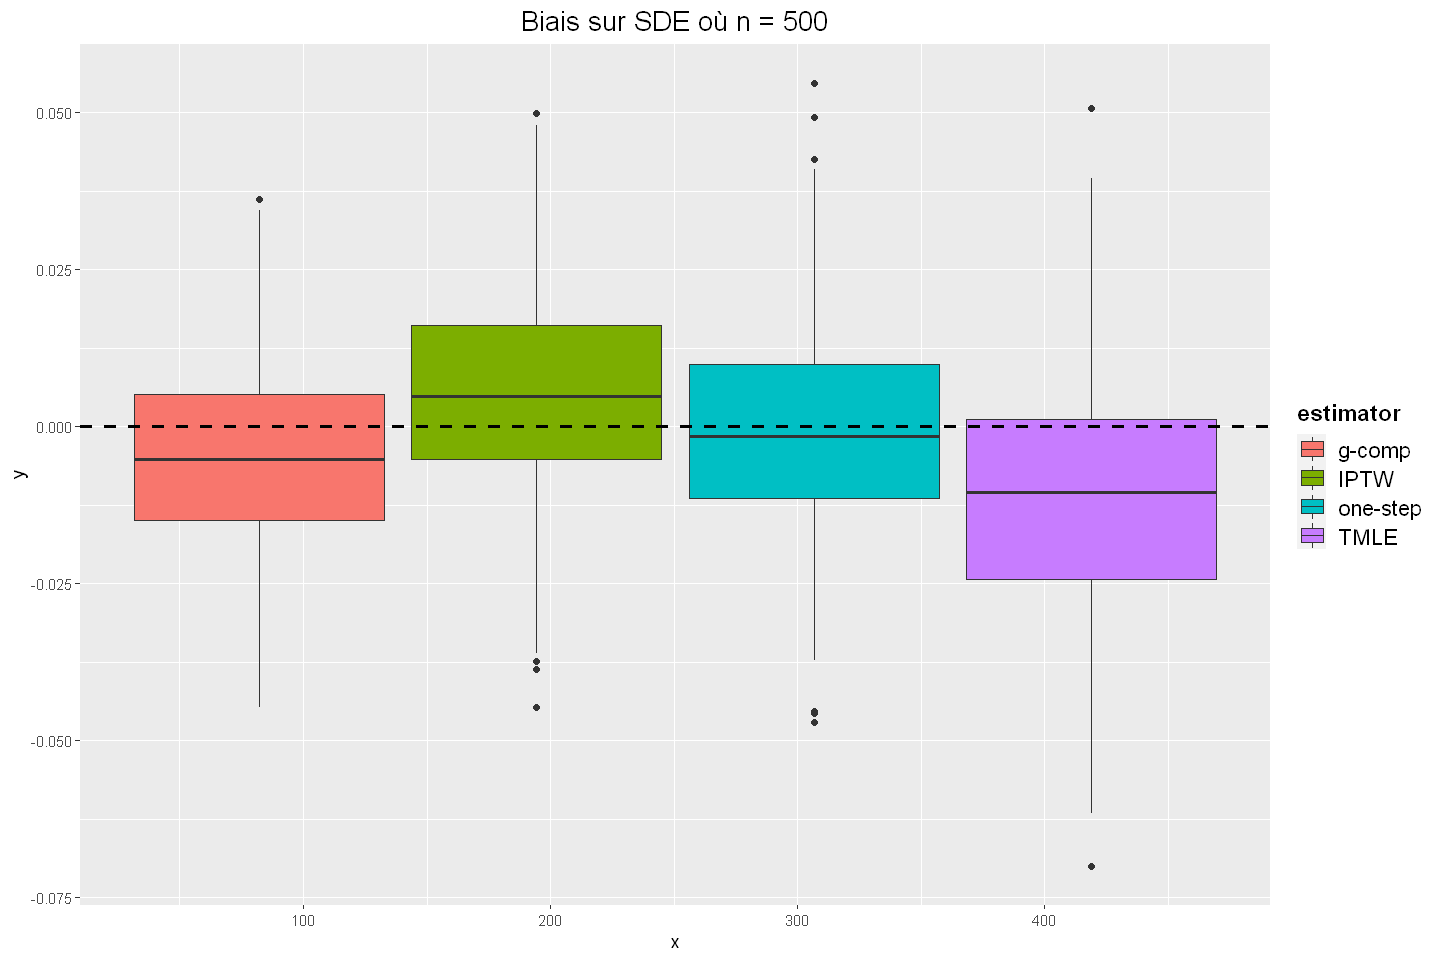

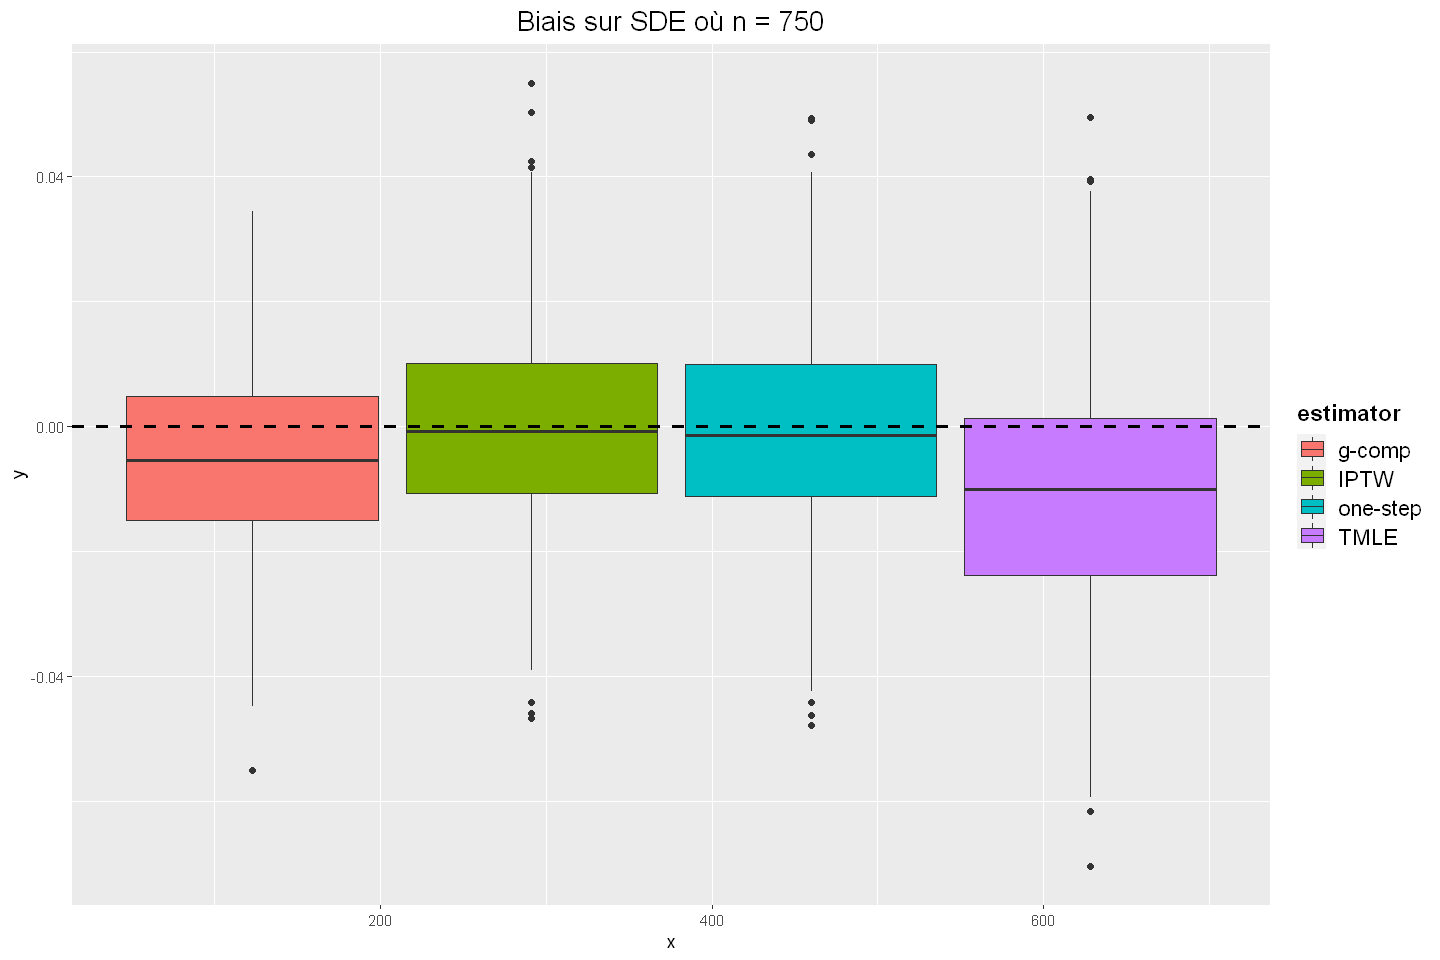

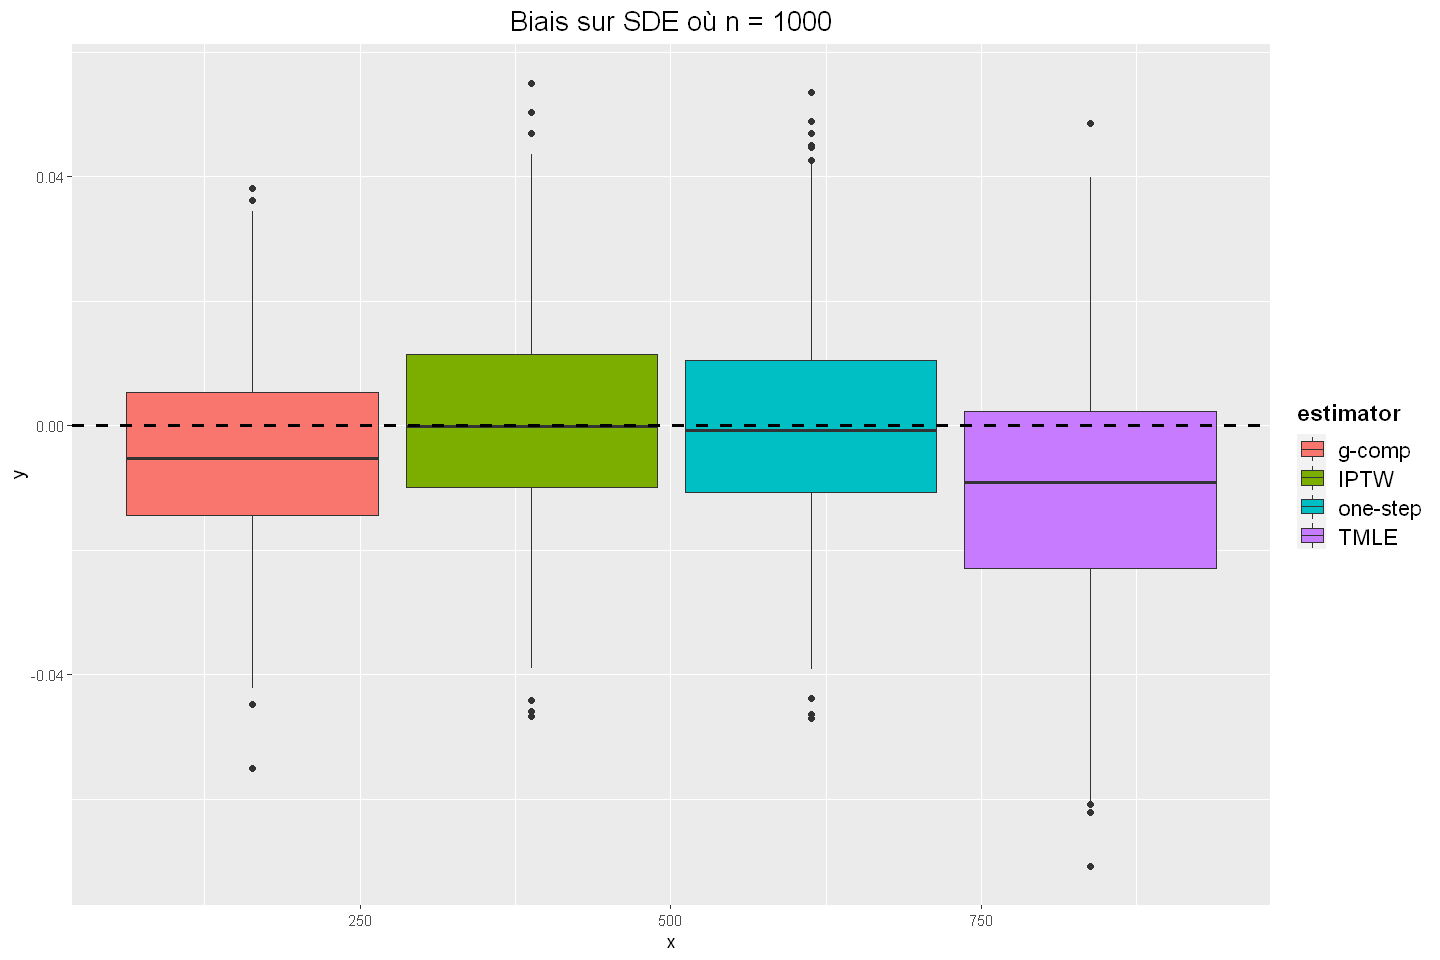

In [5]:
for (n_sim in n_sims) {
  data <- read.csv(paste0("biases_sde_", n_sim, ".csv", sep = ""))
  plot_biases(data, n_sim, "SDE")
}

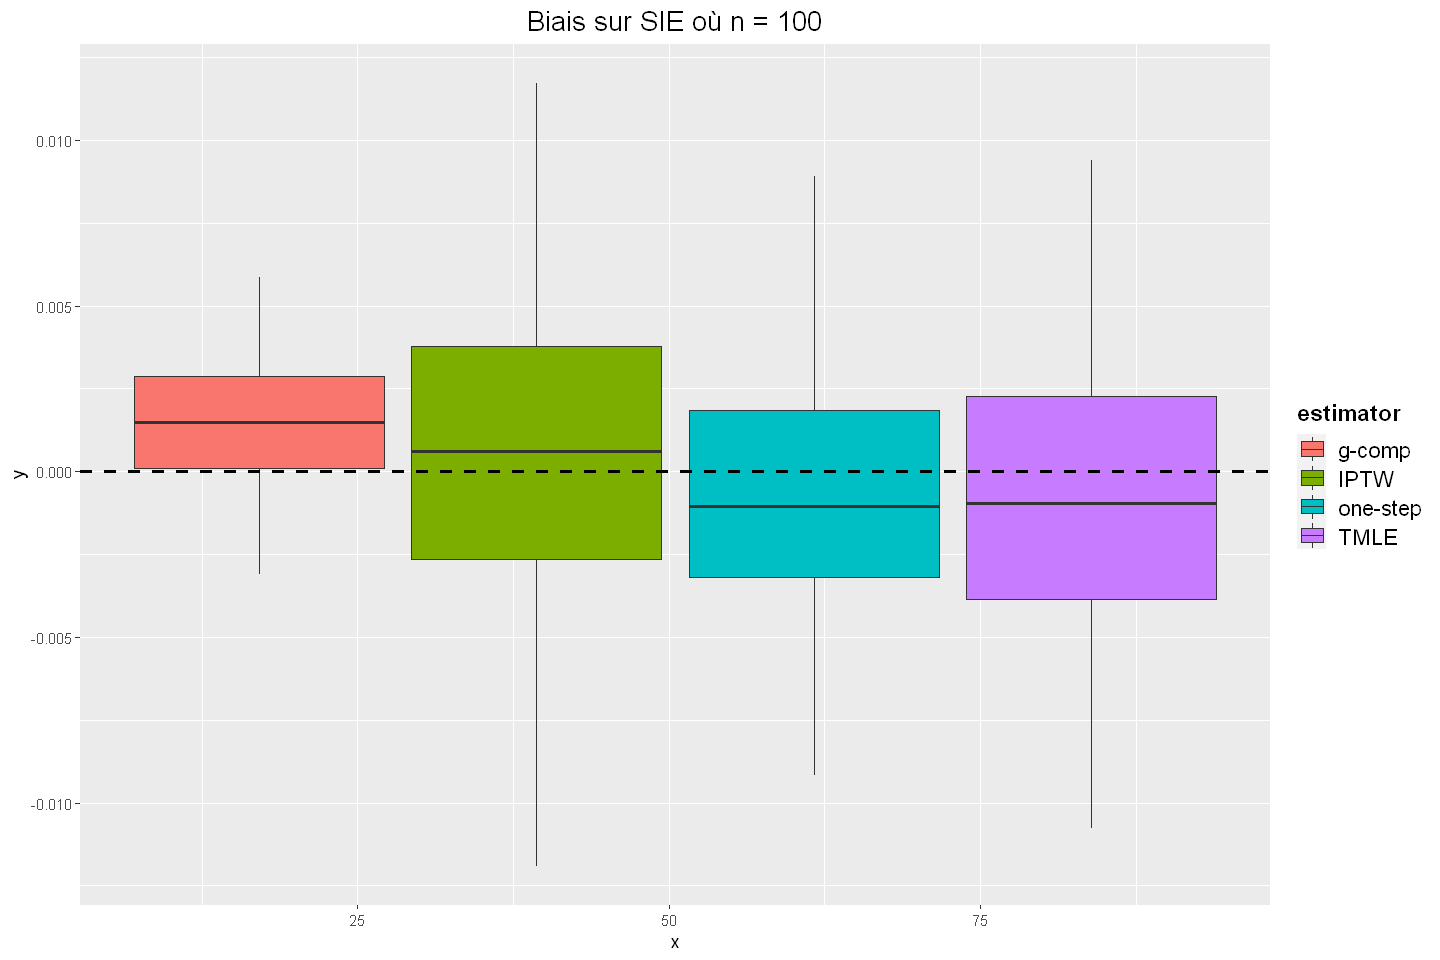

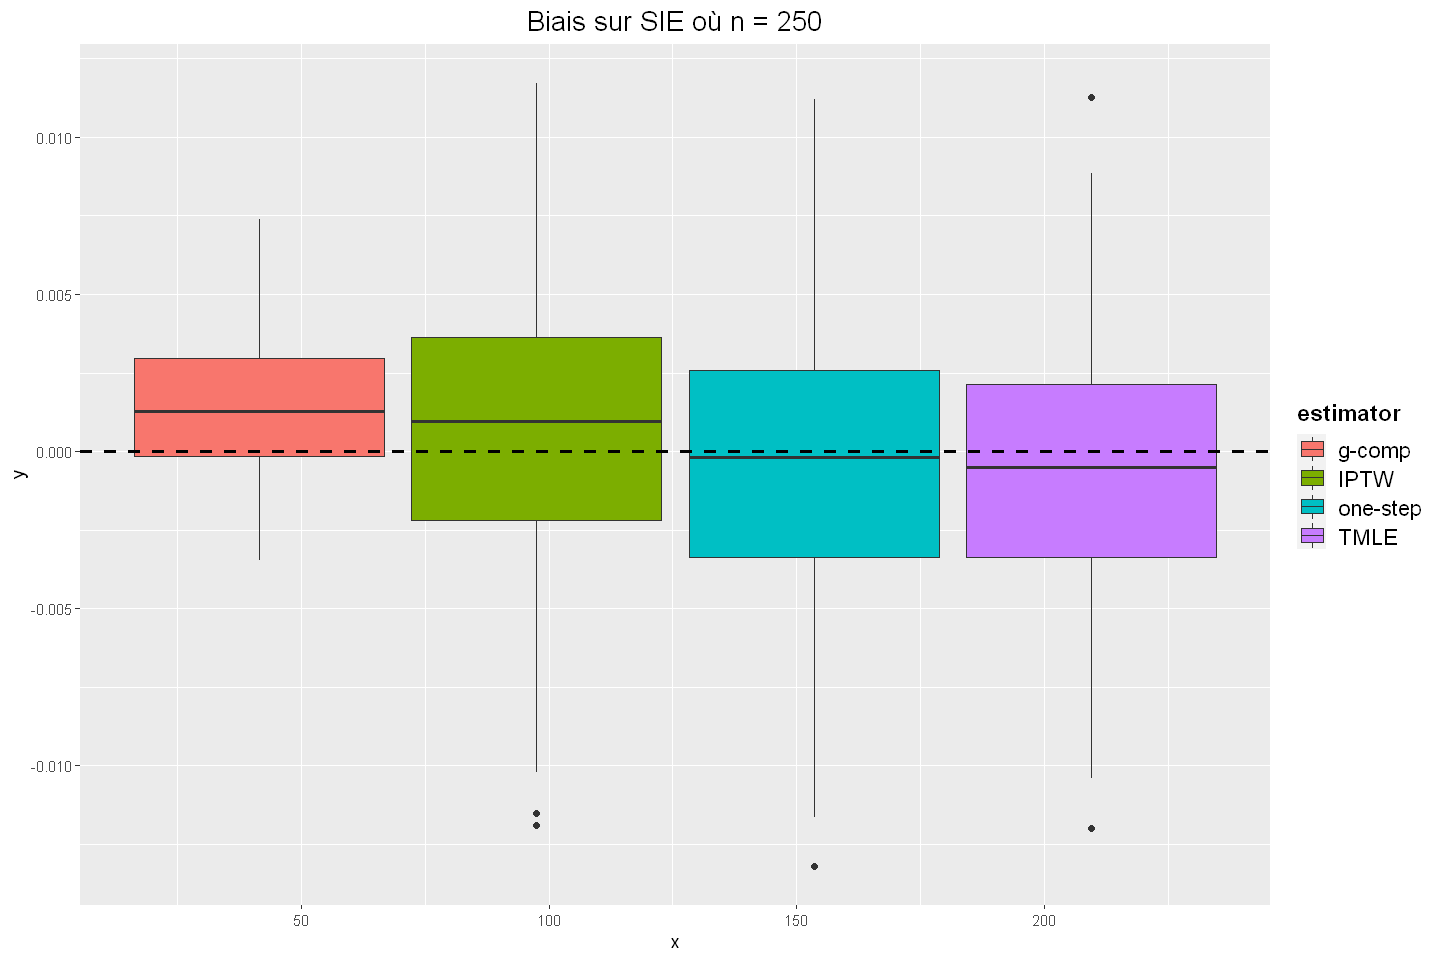

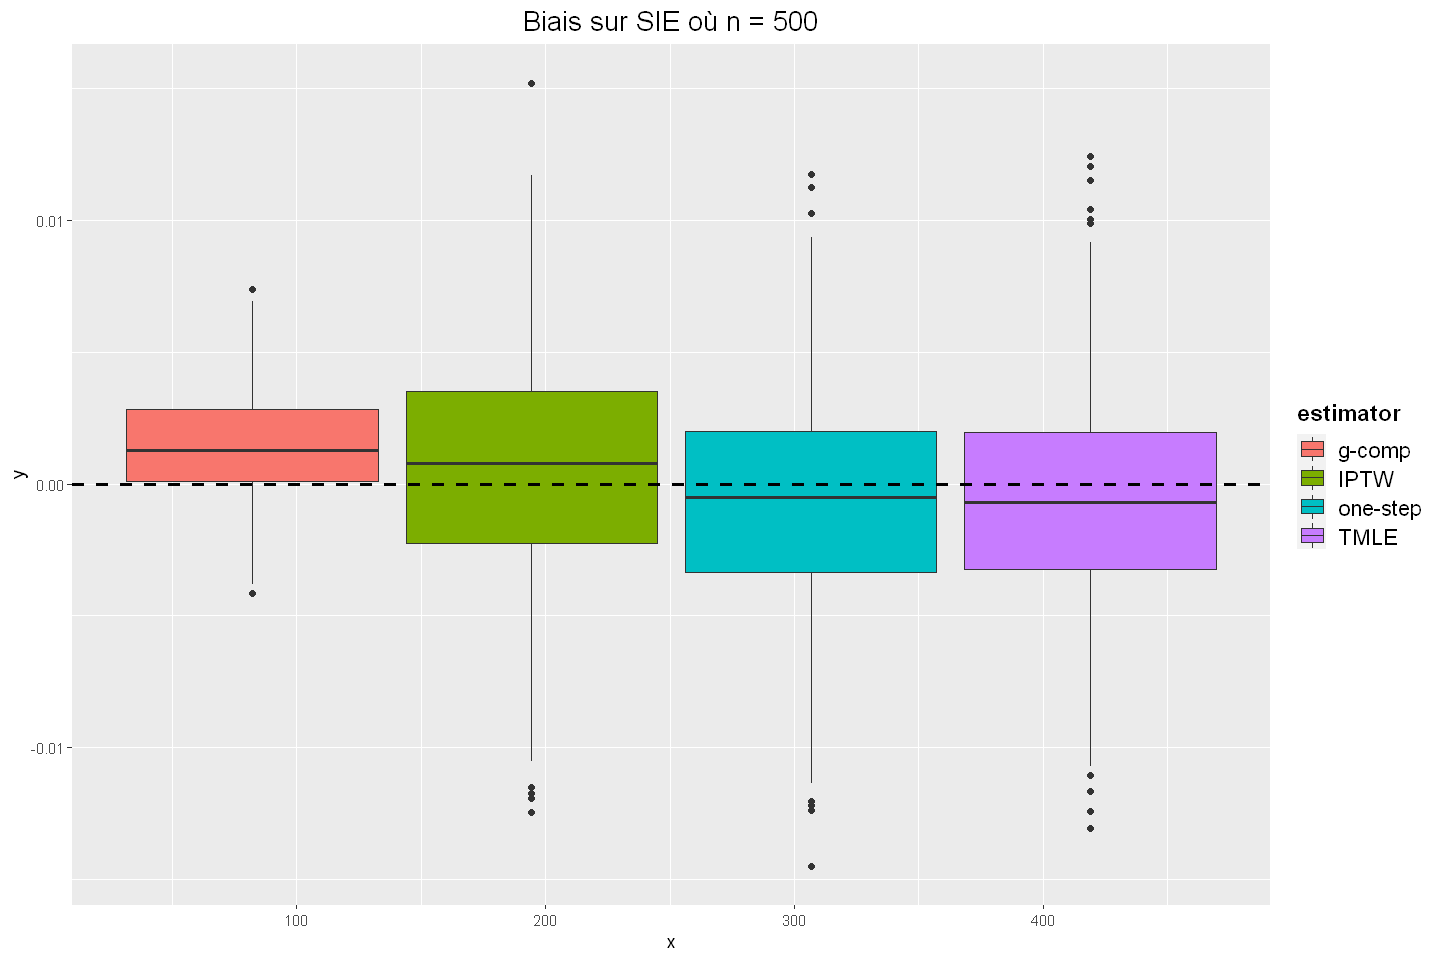

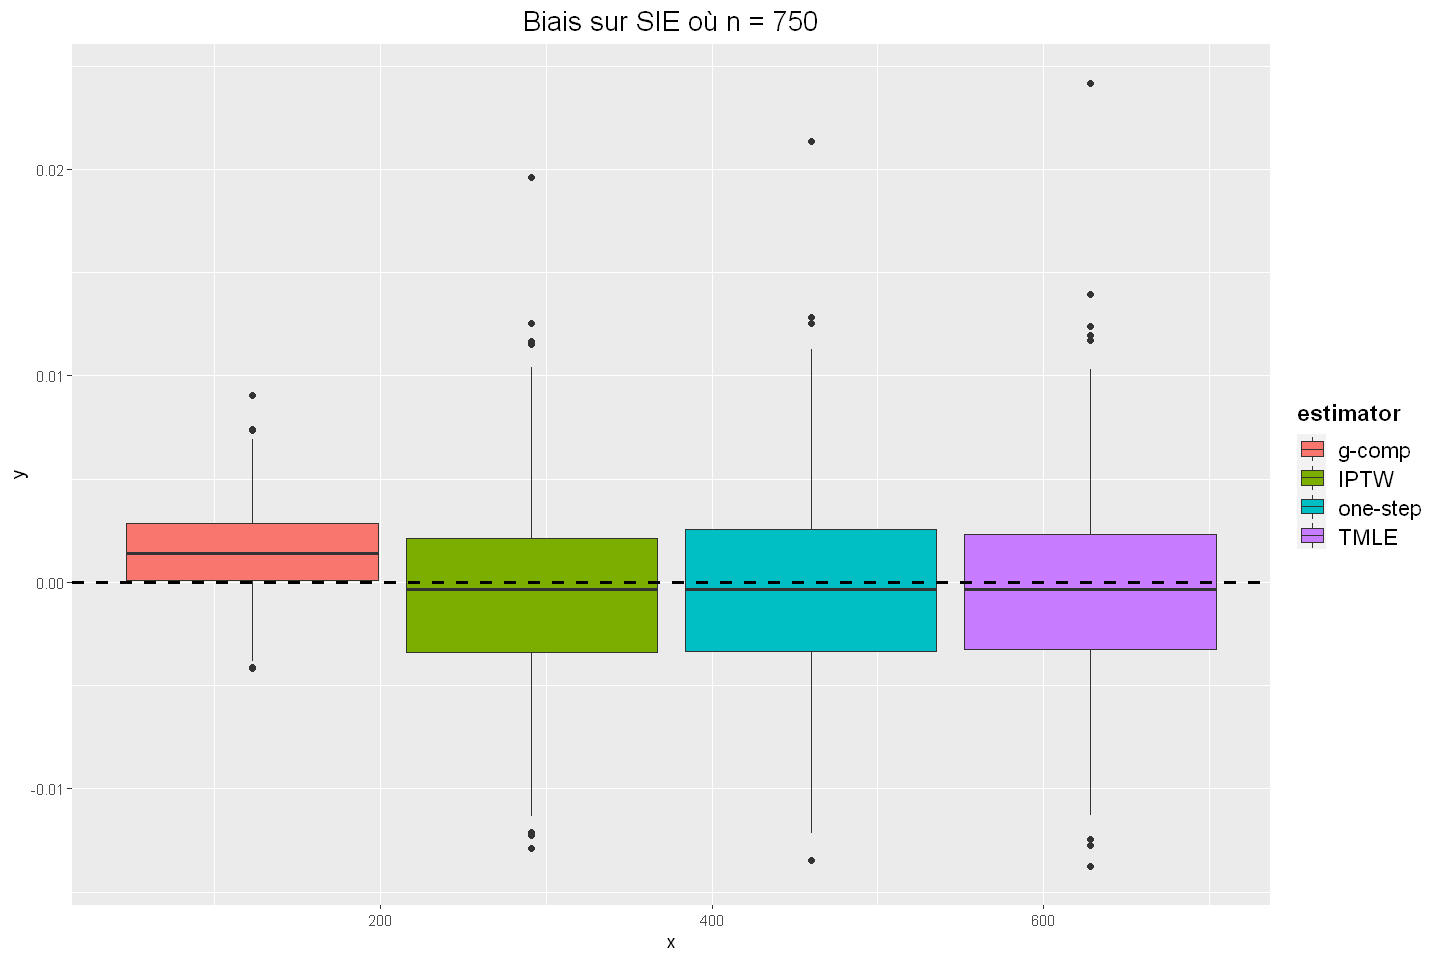

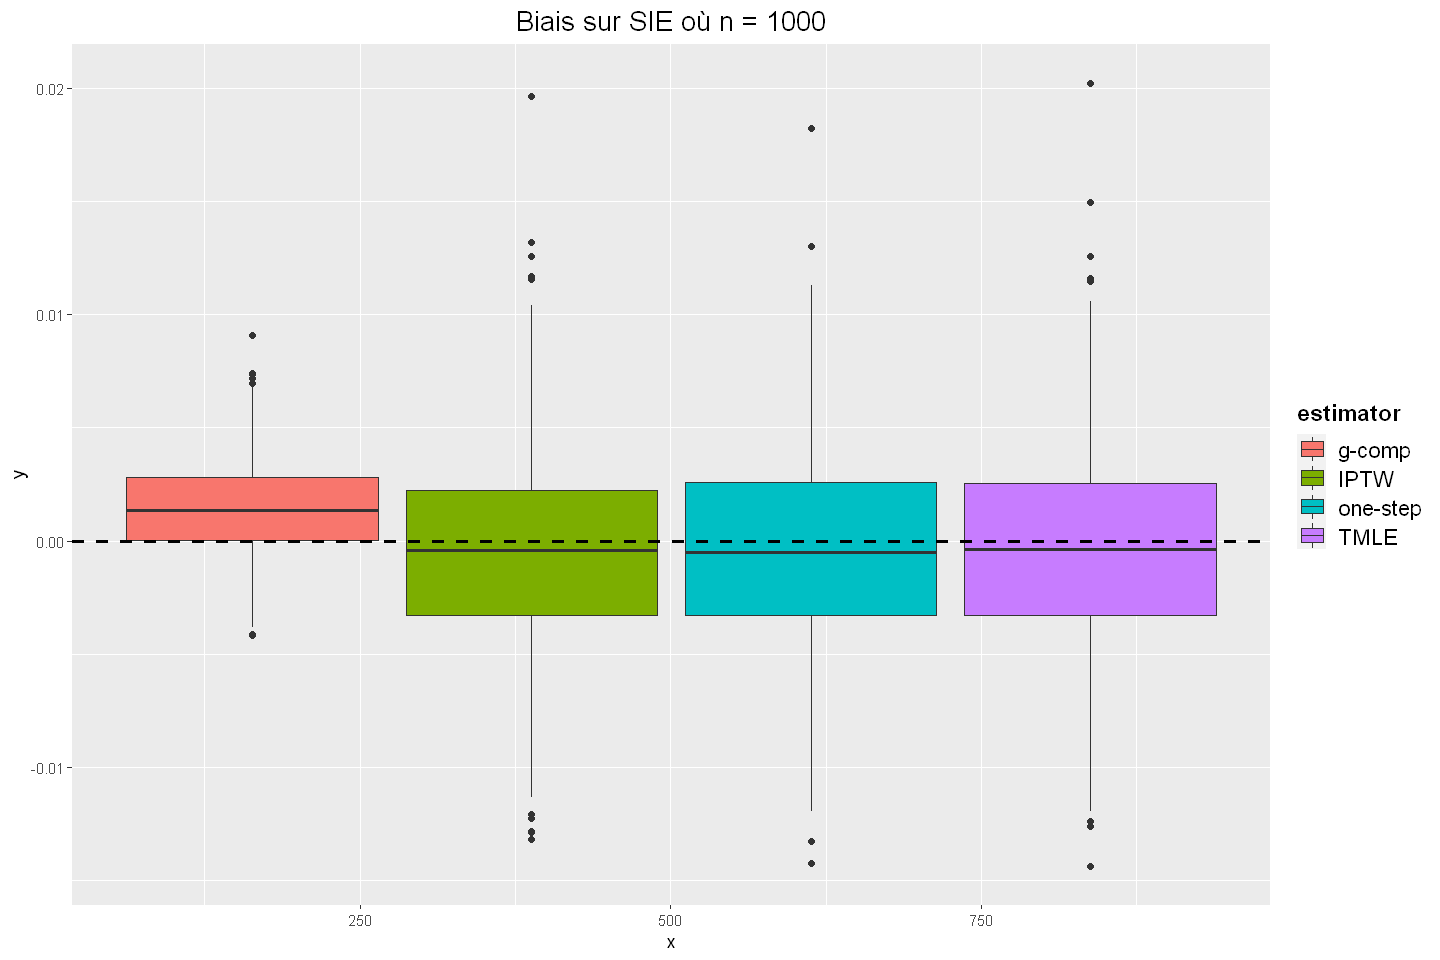

In [6]:
for (n_sim in n_sims) {
  data <- read.csv(paste0("biases_sie_", n_sim, ".csv", sep = ""))
  plot_biases(data, n_sim, "SIE")
}

## Positivité

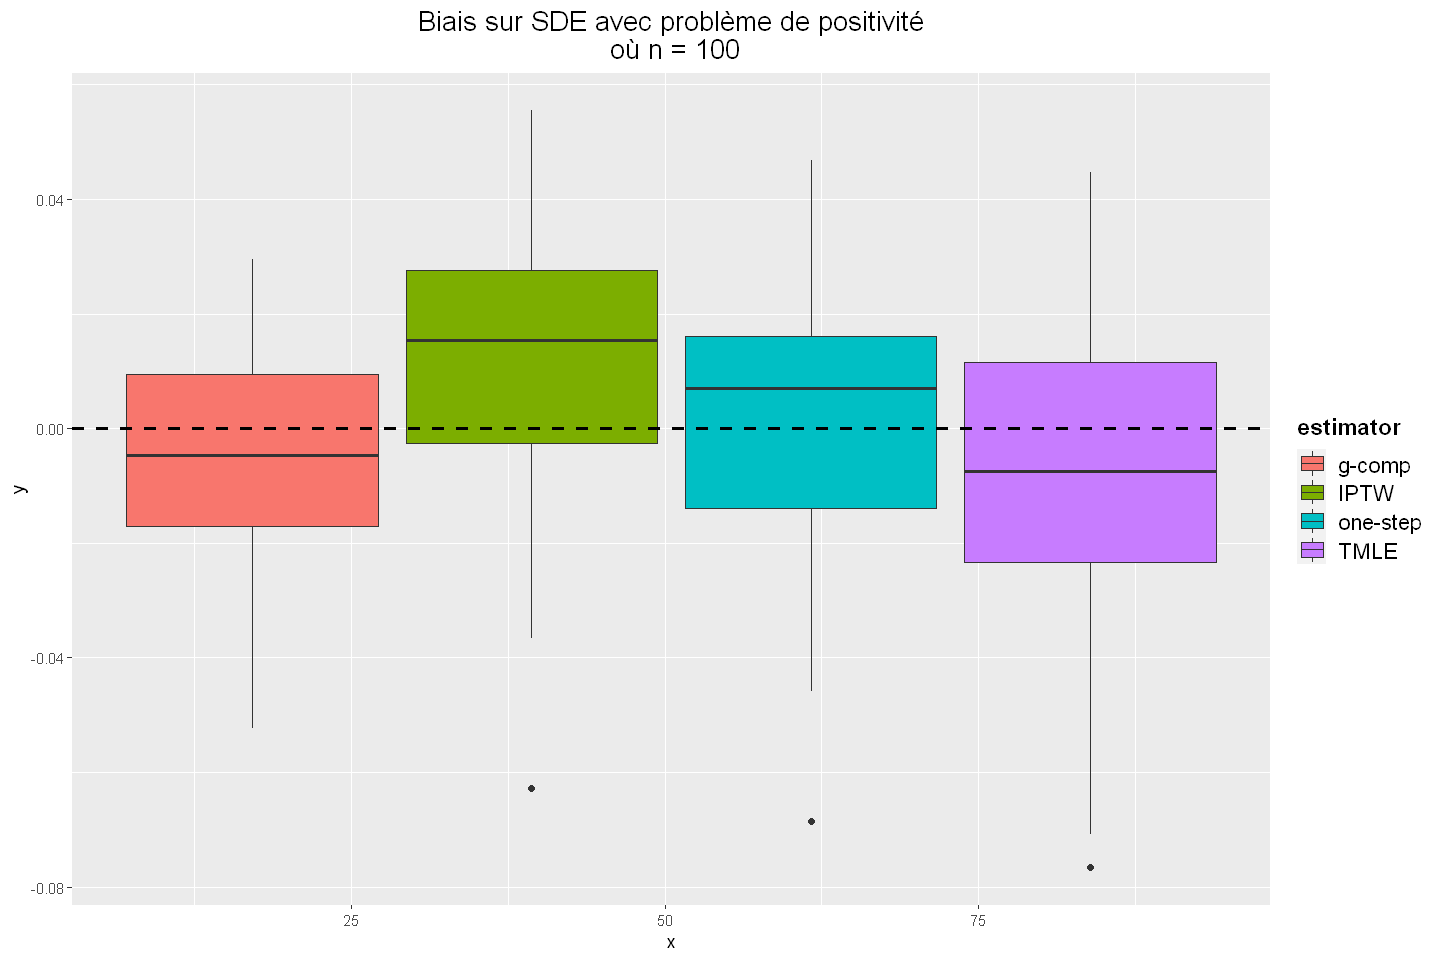

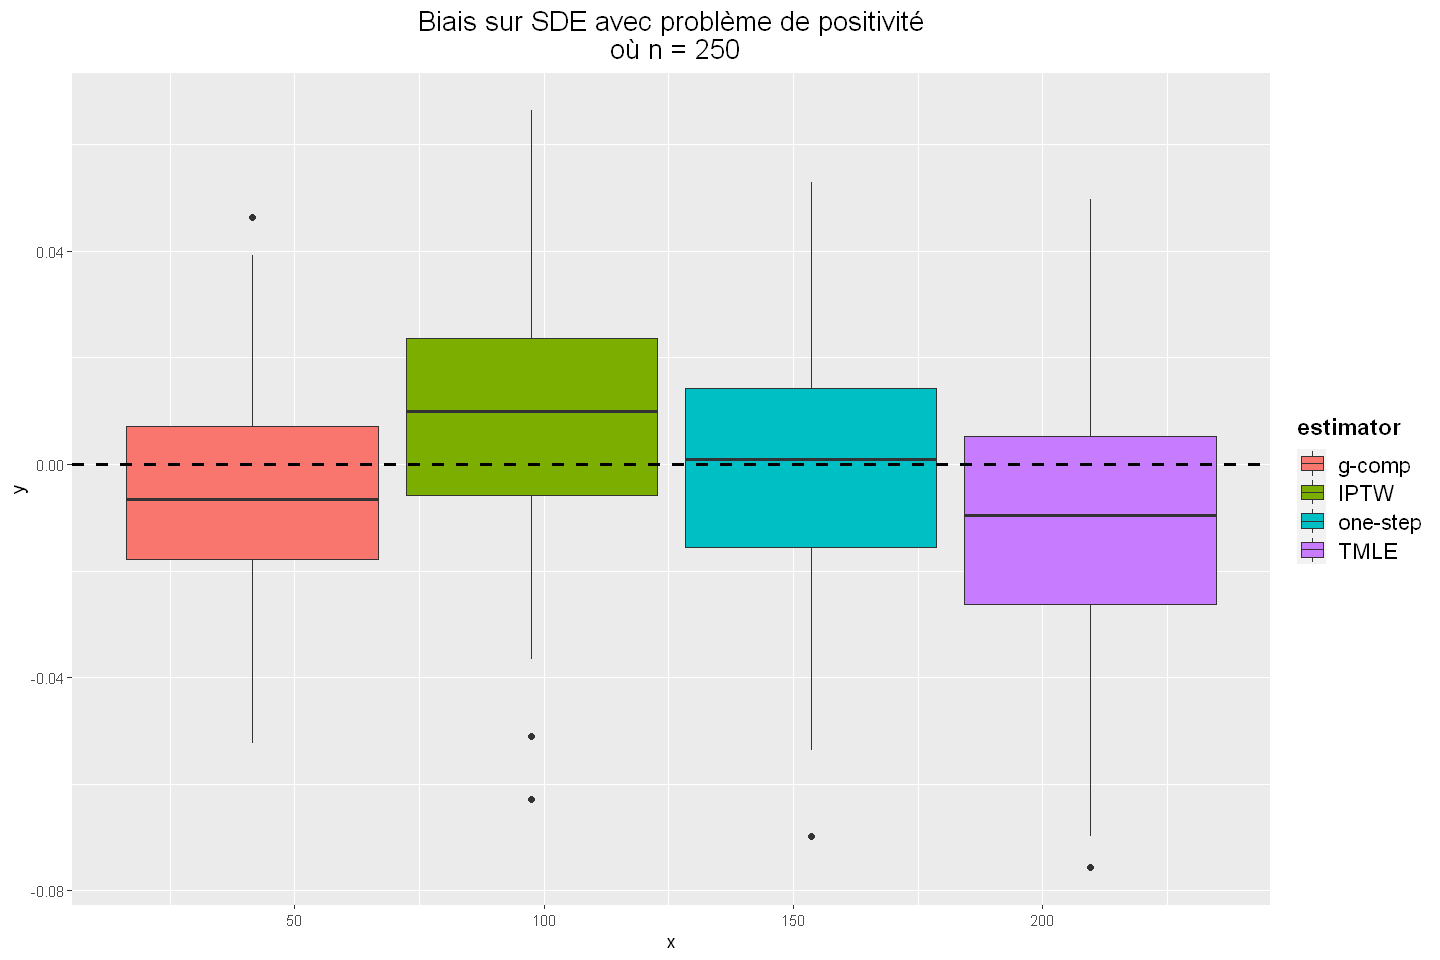

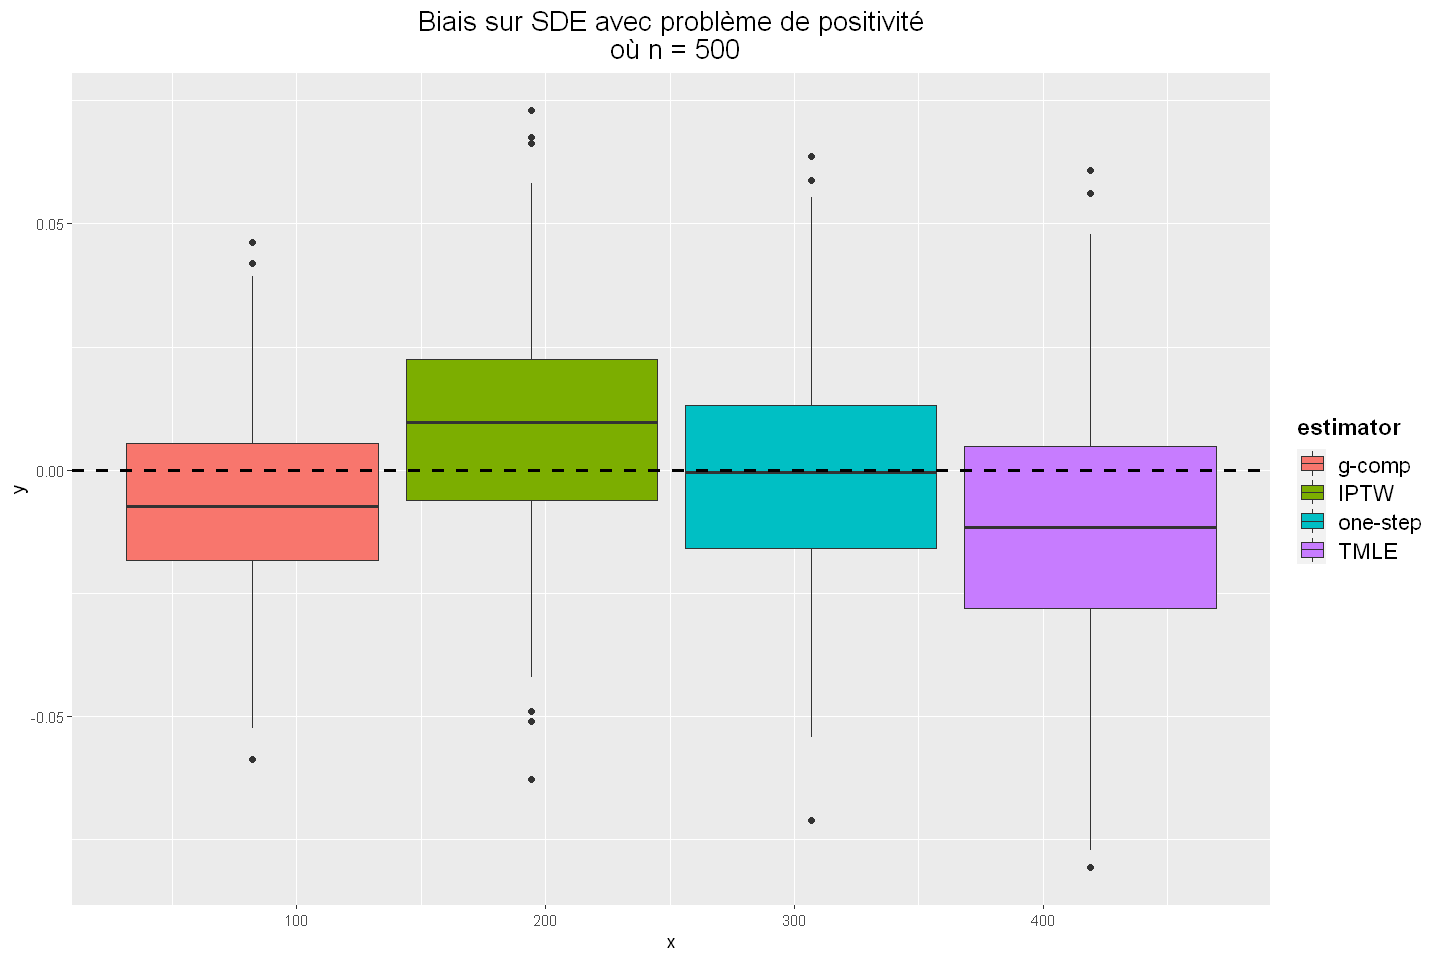

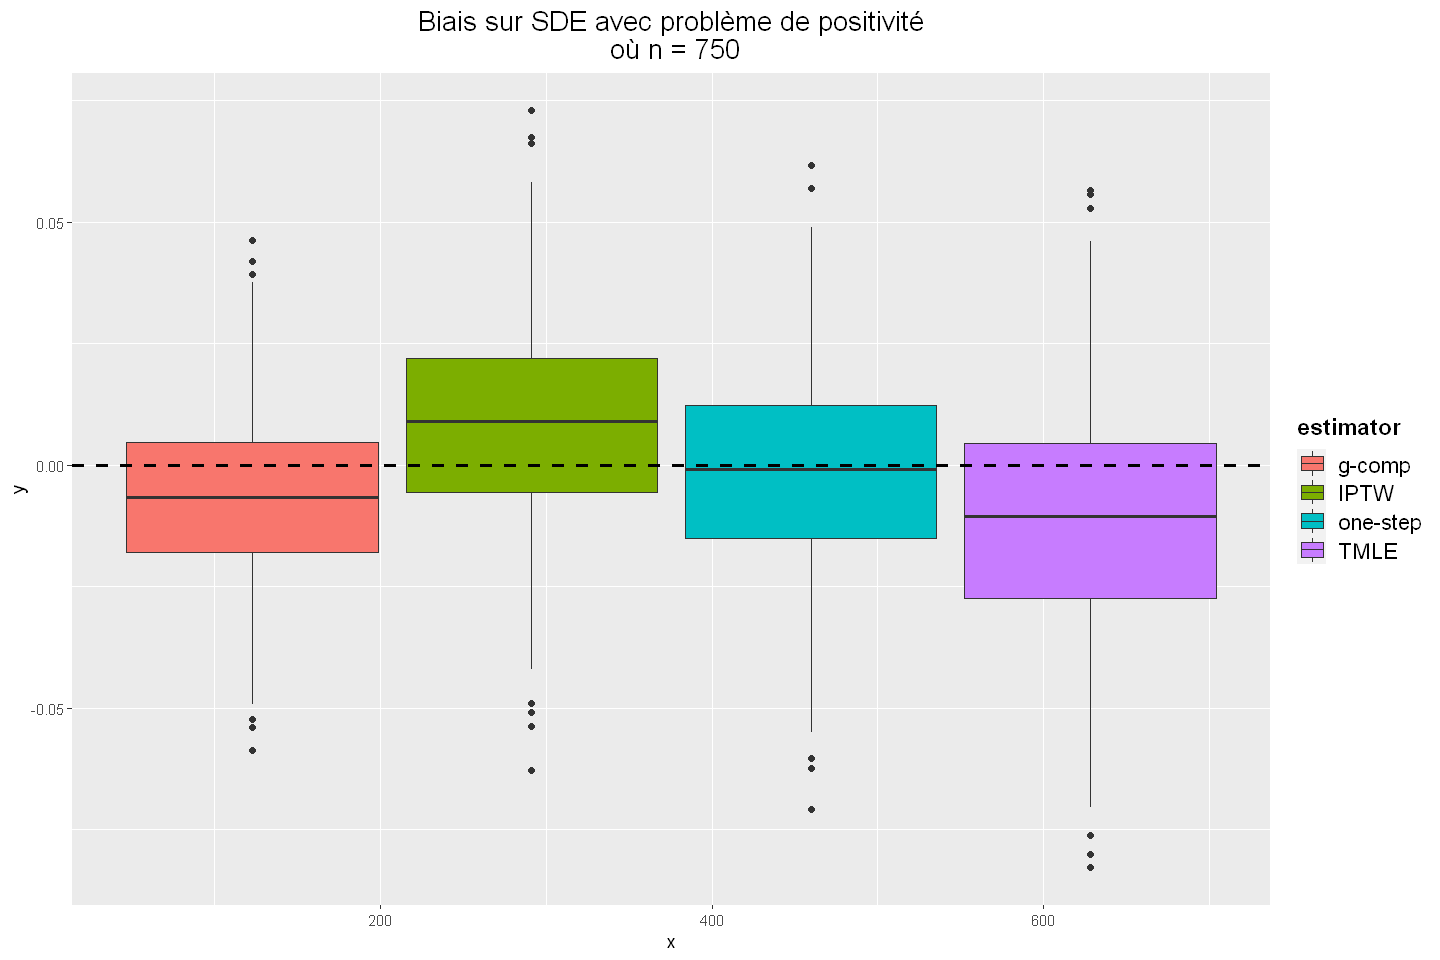

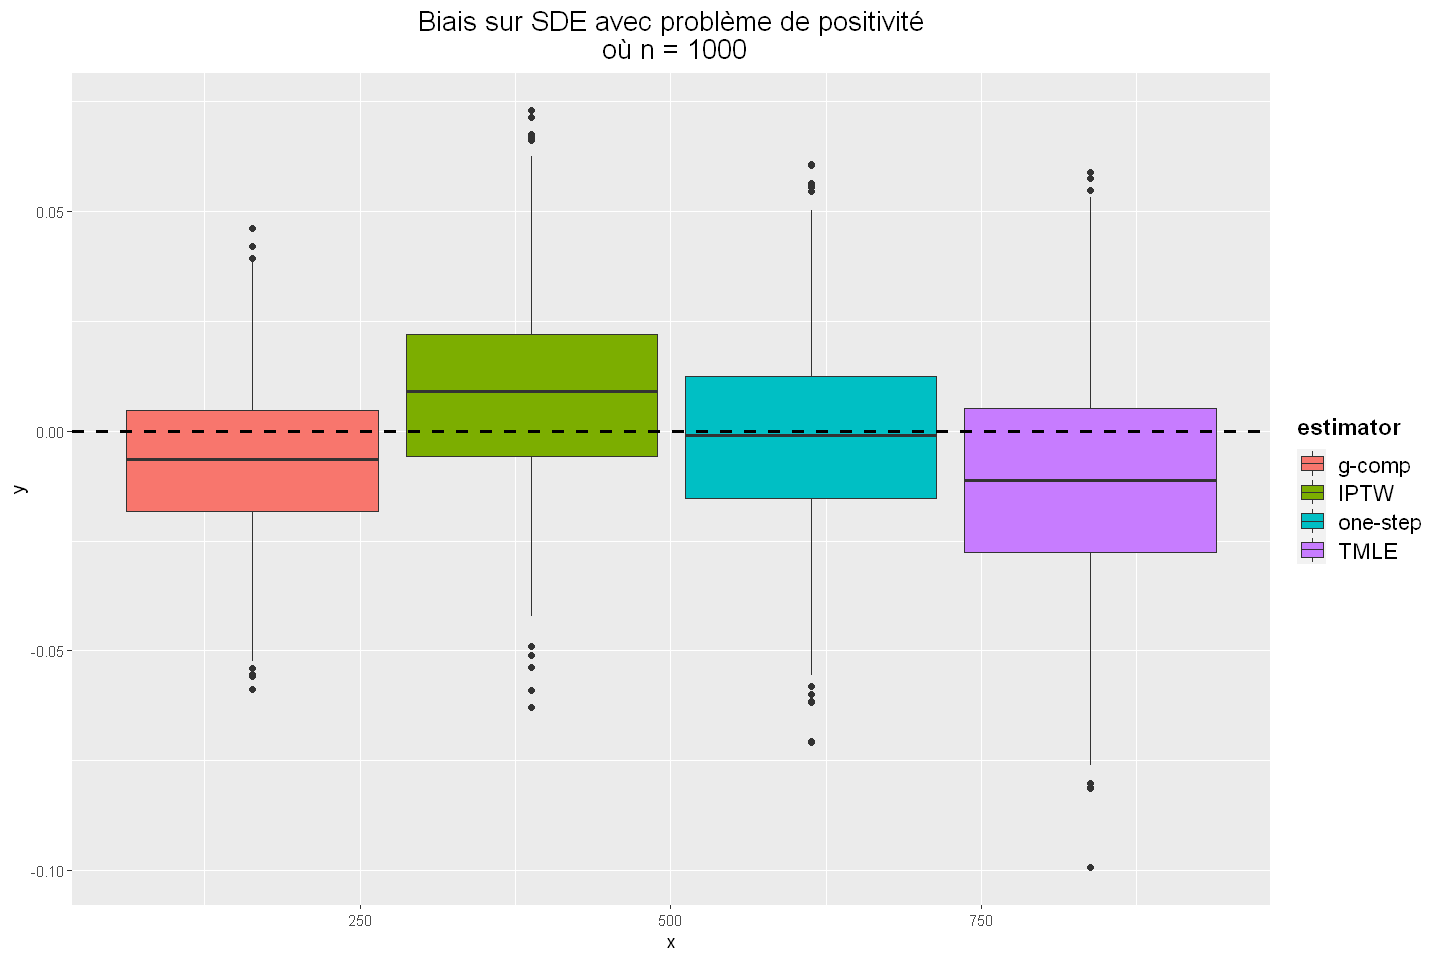

In [7]:
for (n_sim in n_sims) {
  data <- read.csv(paste0("biases_sde_posit_", n_sim, ".csv", sep = ""))
  plot_biases(data, n_sim, "SDE avec problème de positivité\n")
}

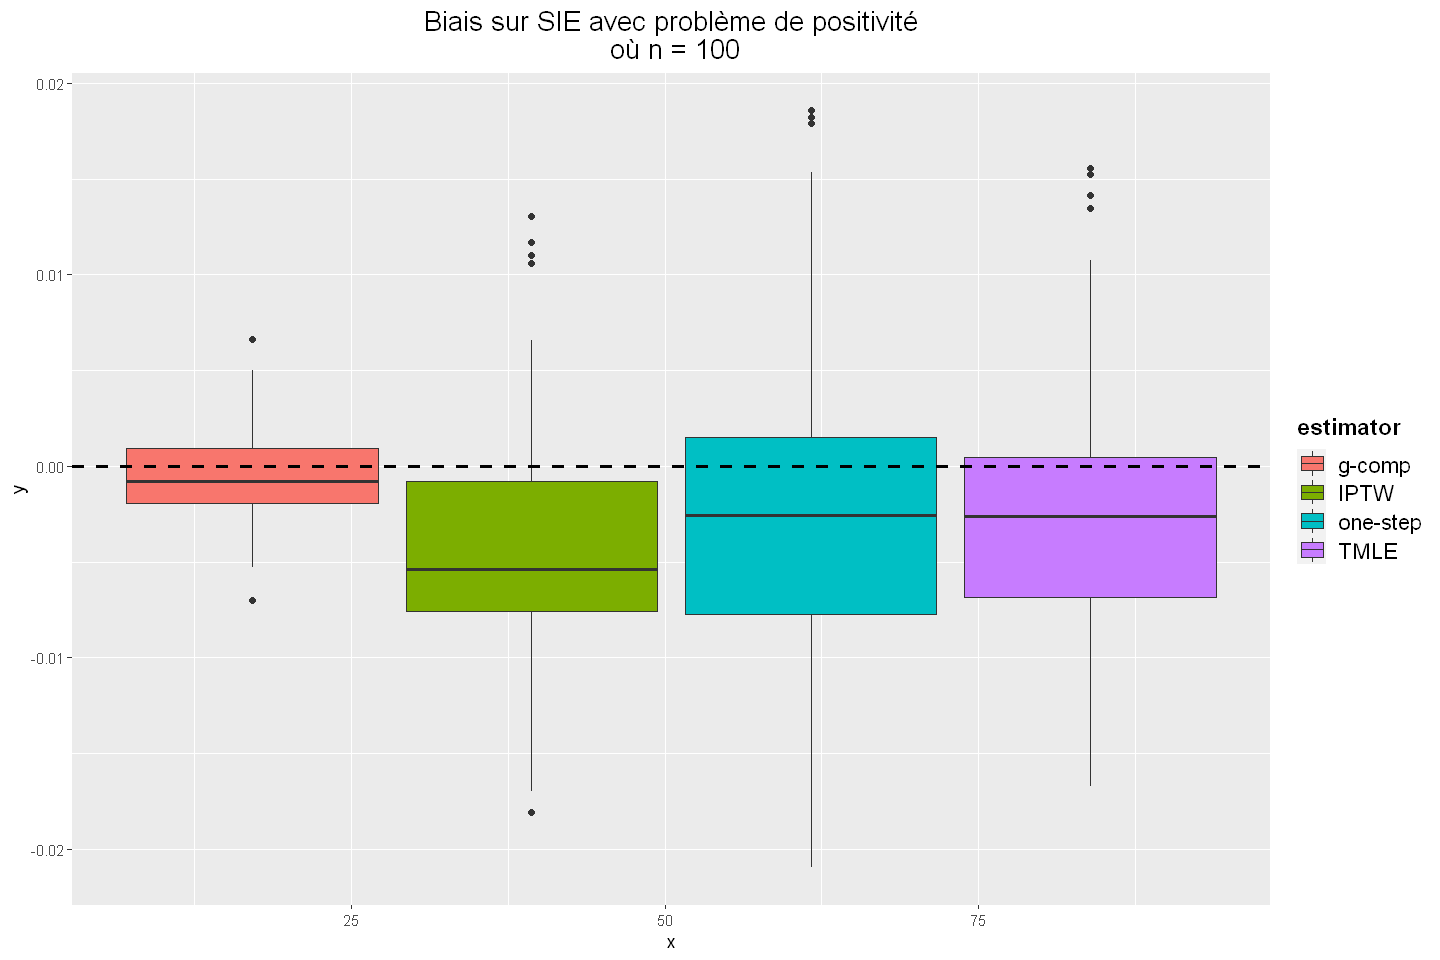

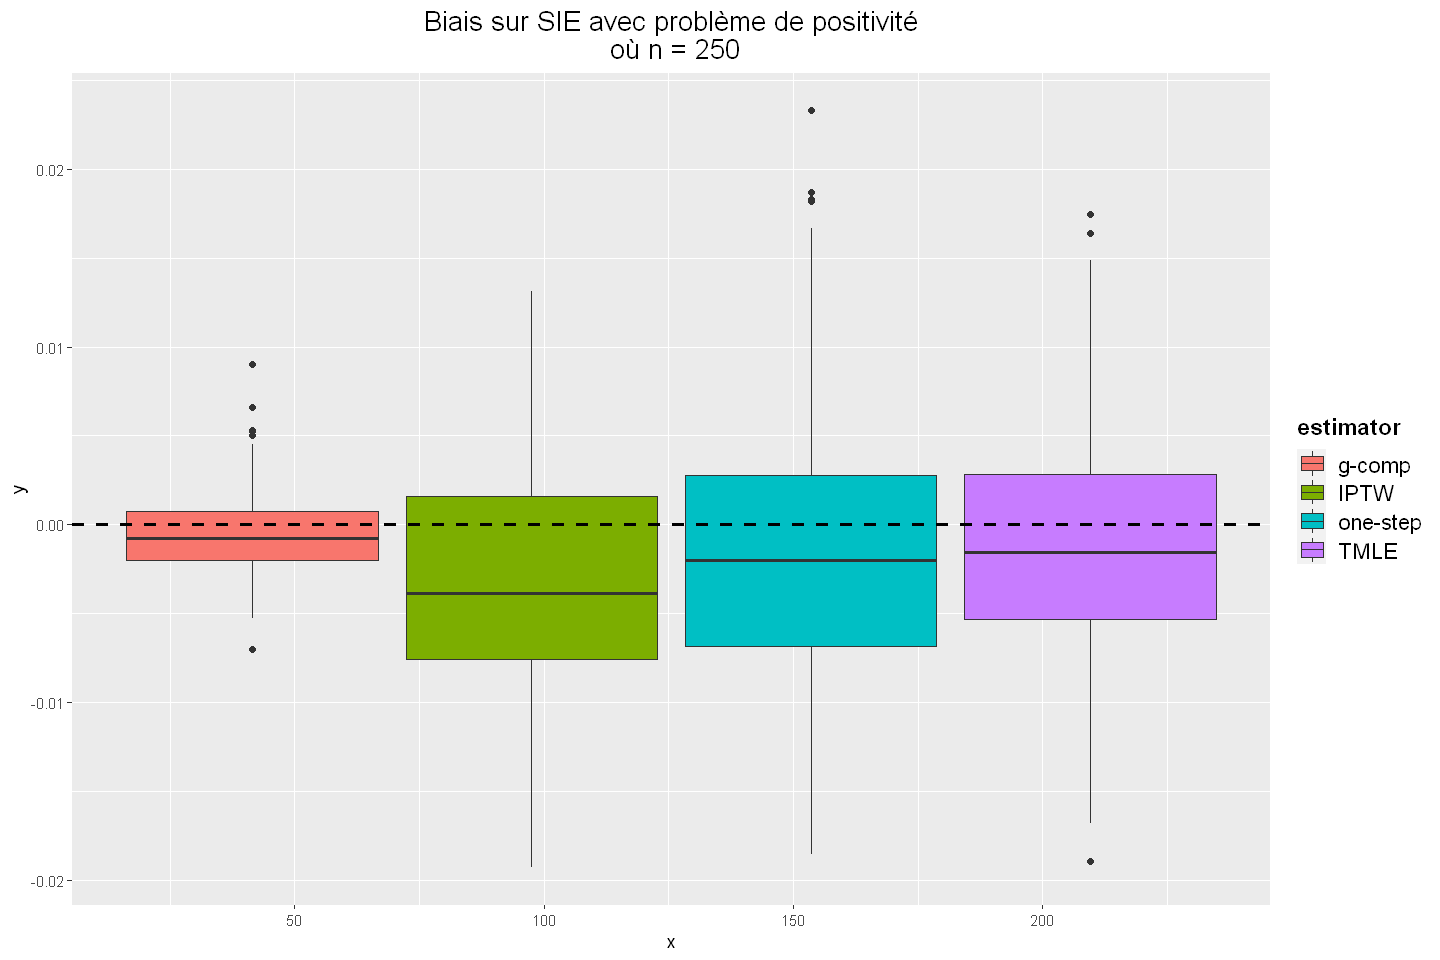

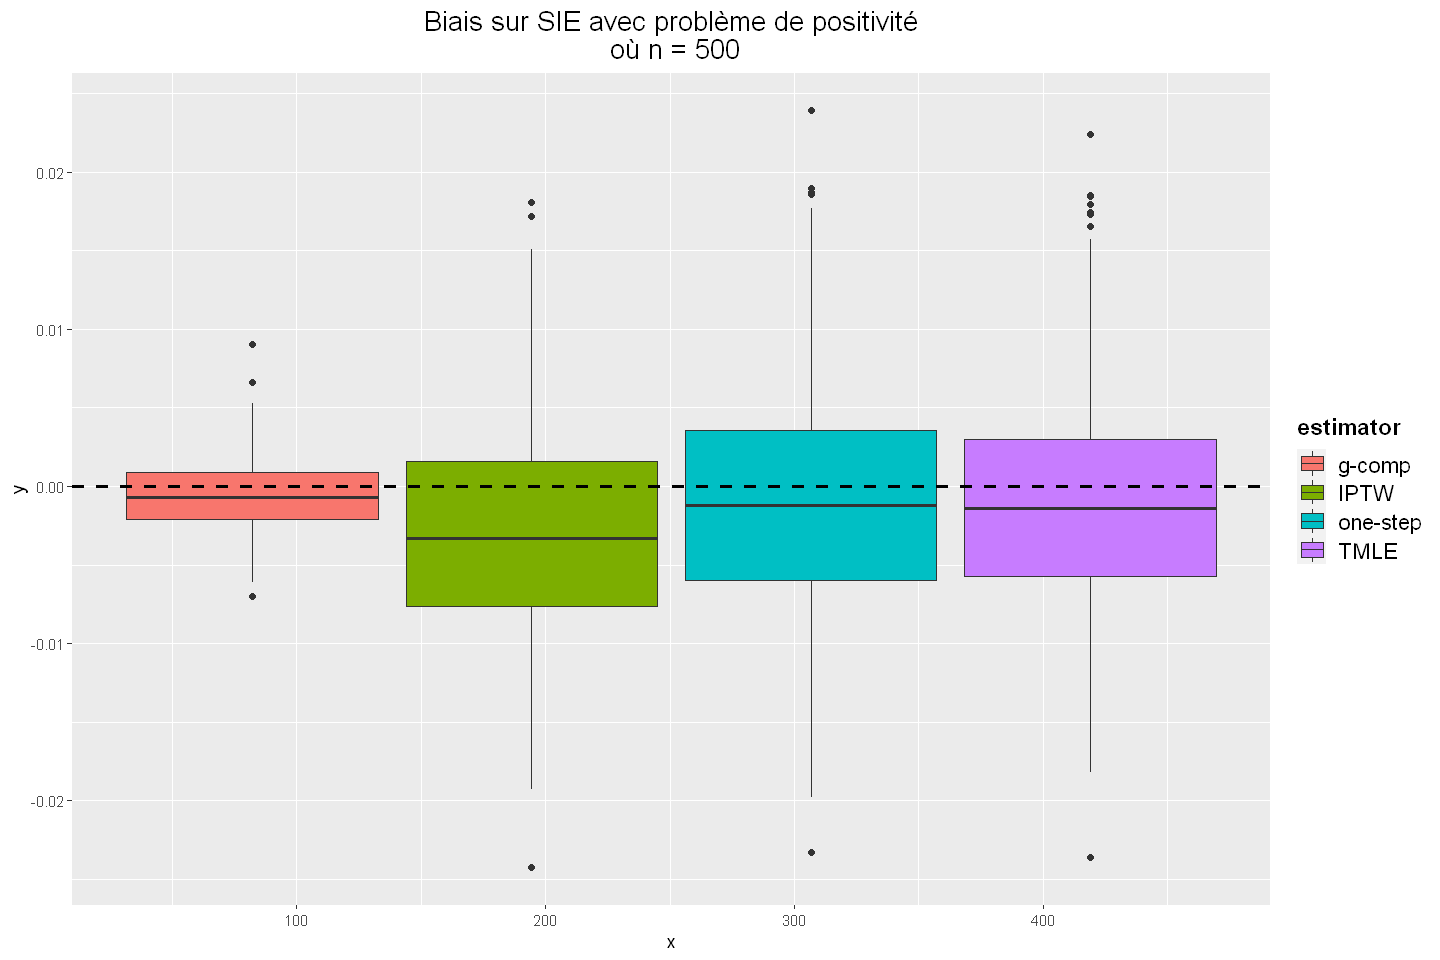

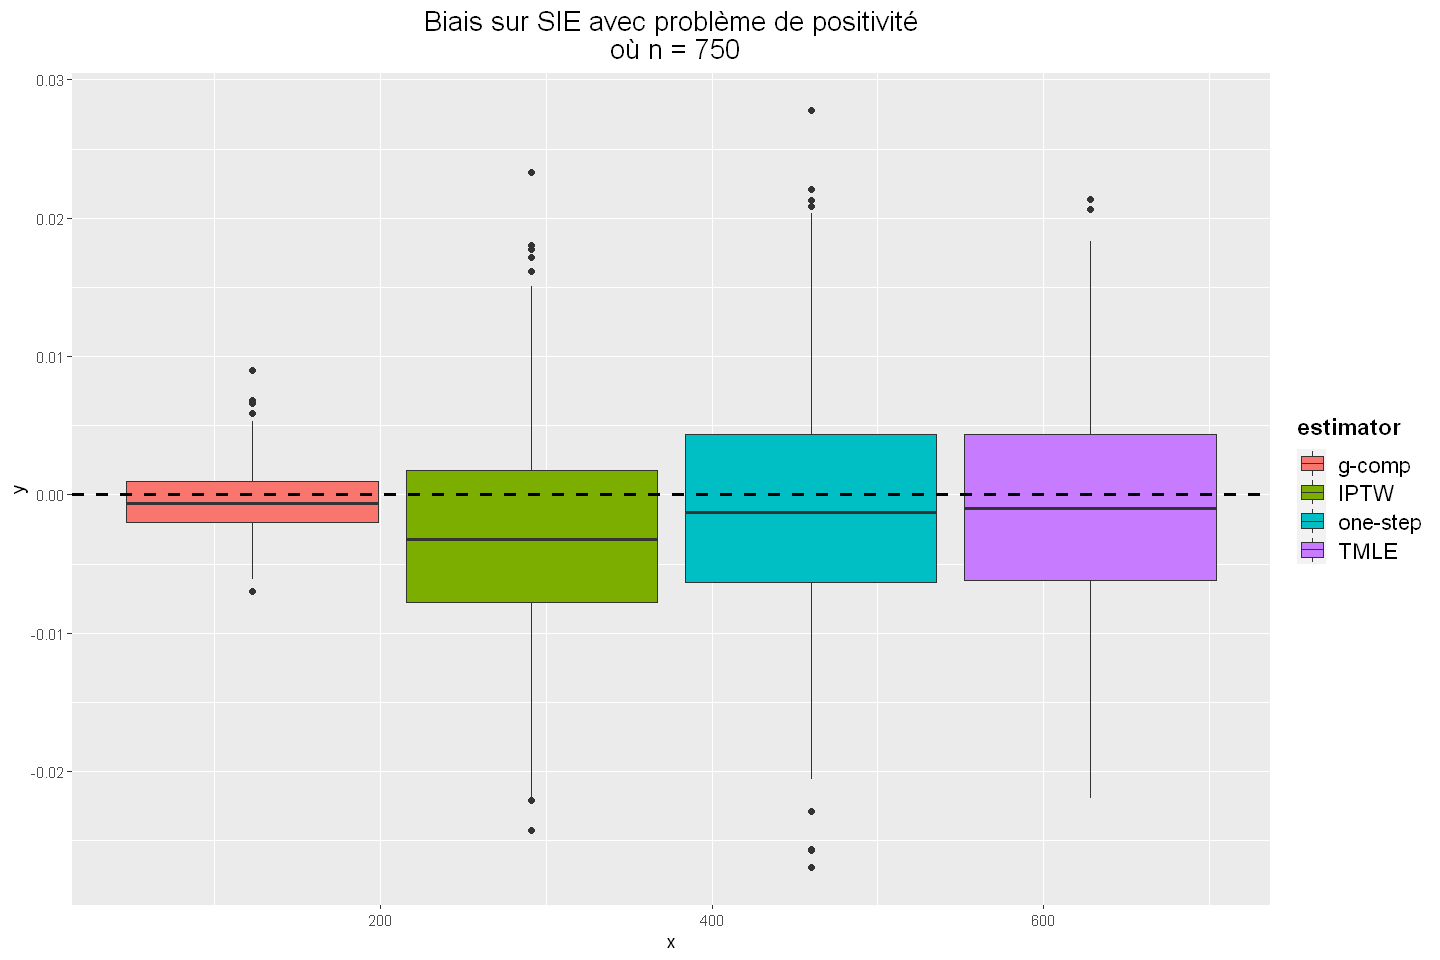

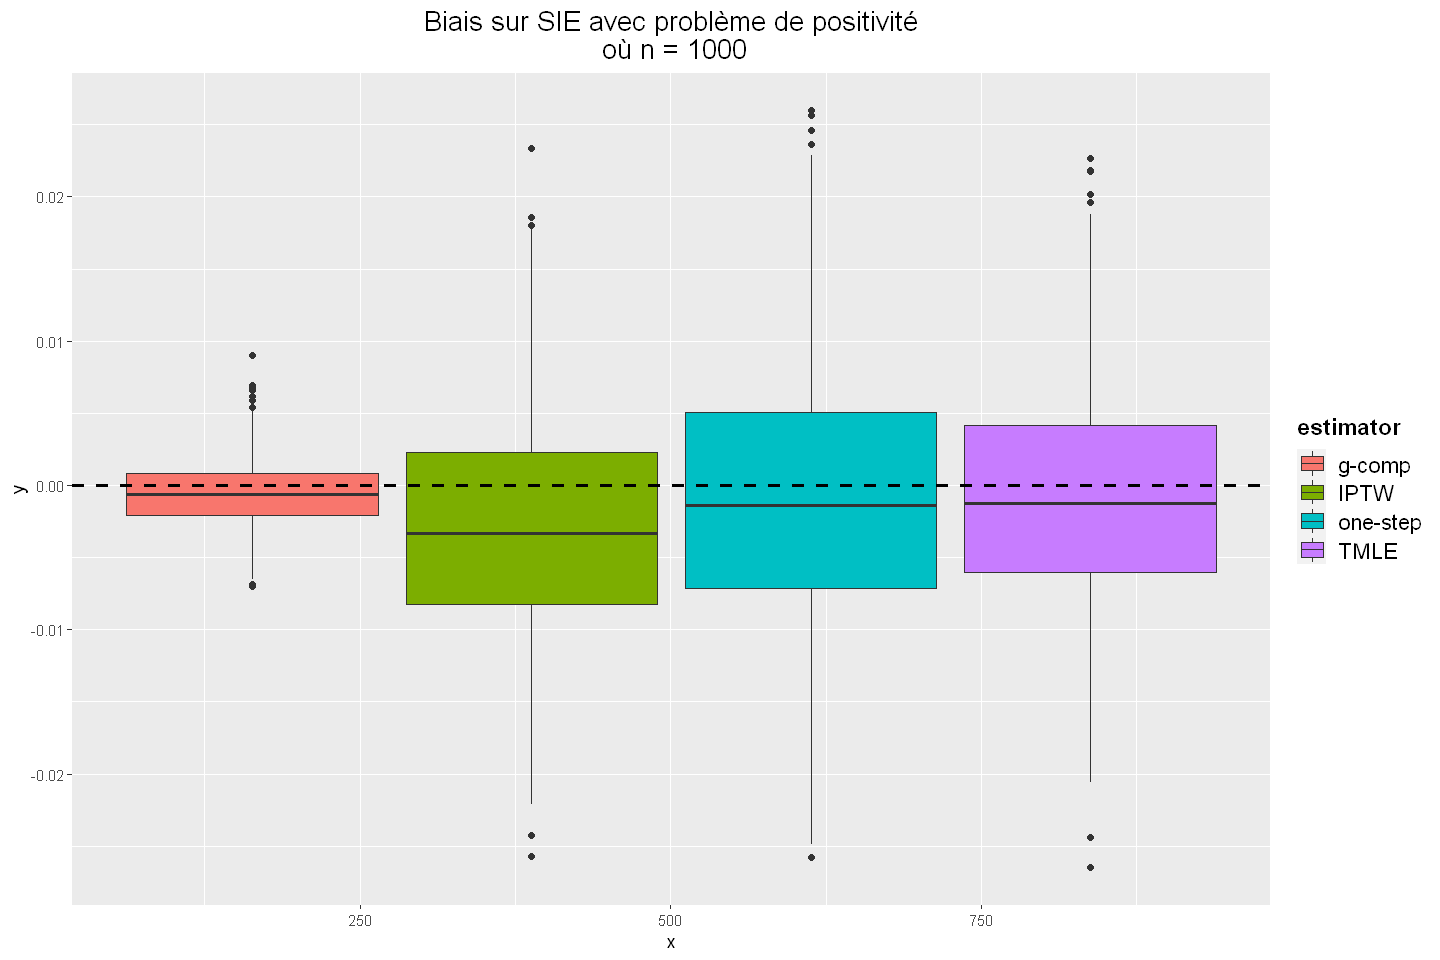

In [8]:
for (n_sim in n_sims) {
  data <- read.csv(paste0("biases_sie_posit_", n_sim, ".csv", sep = ""))
  plot_biases(data, n_sim, "SIE avec problème de positivité\n")
}

## Variables baseline continues

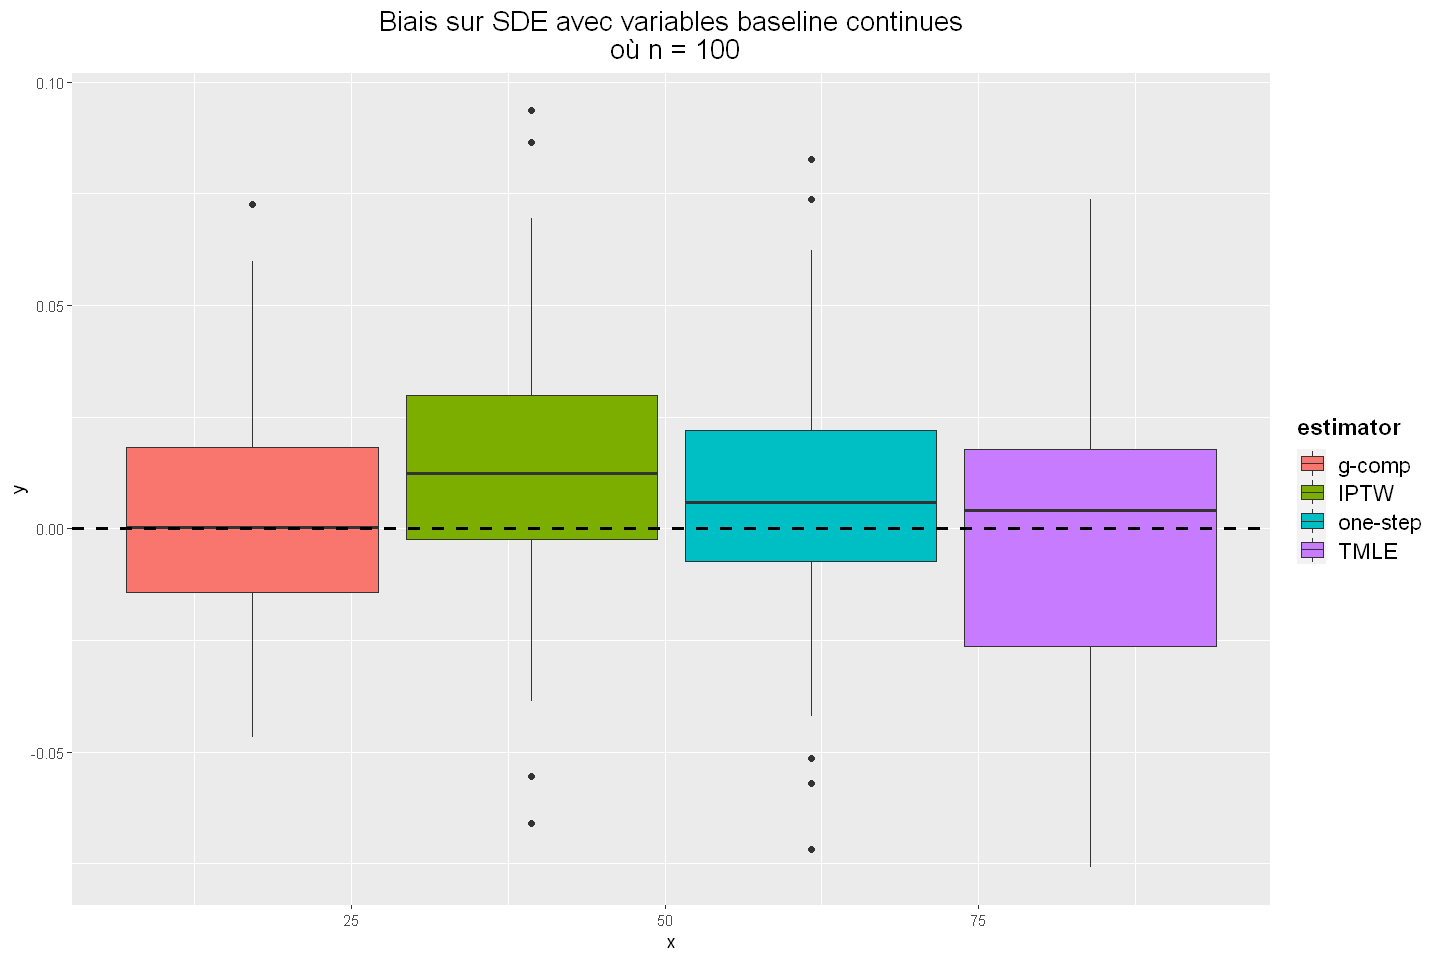

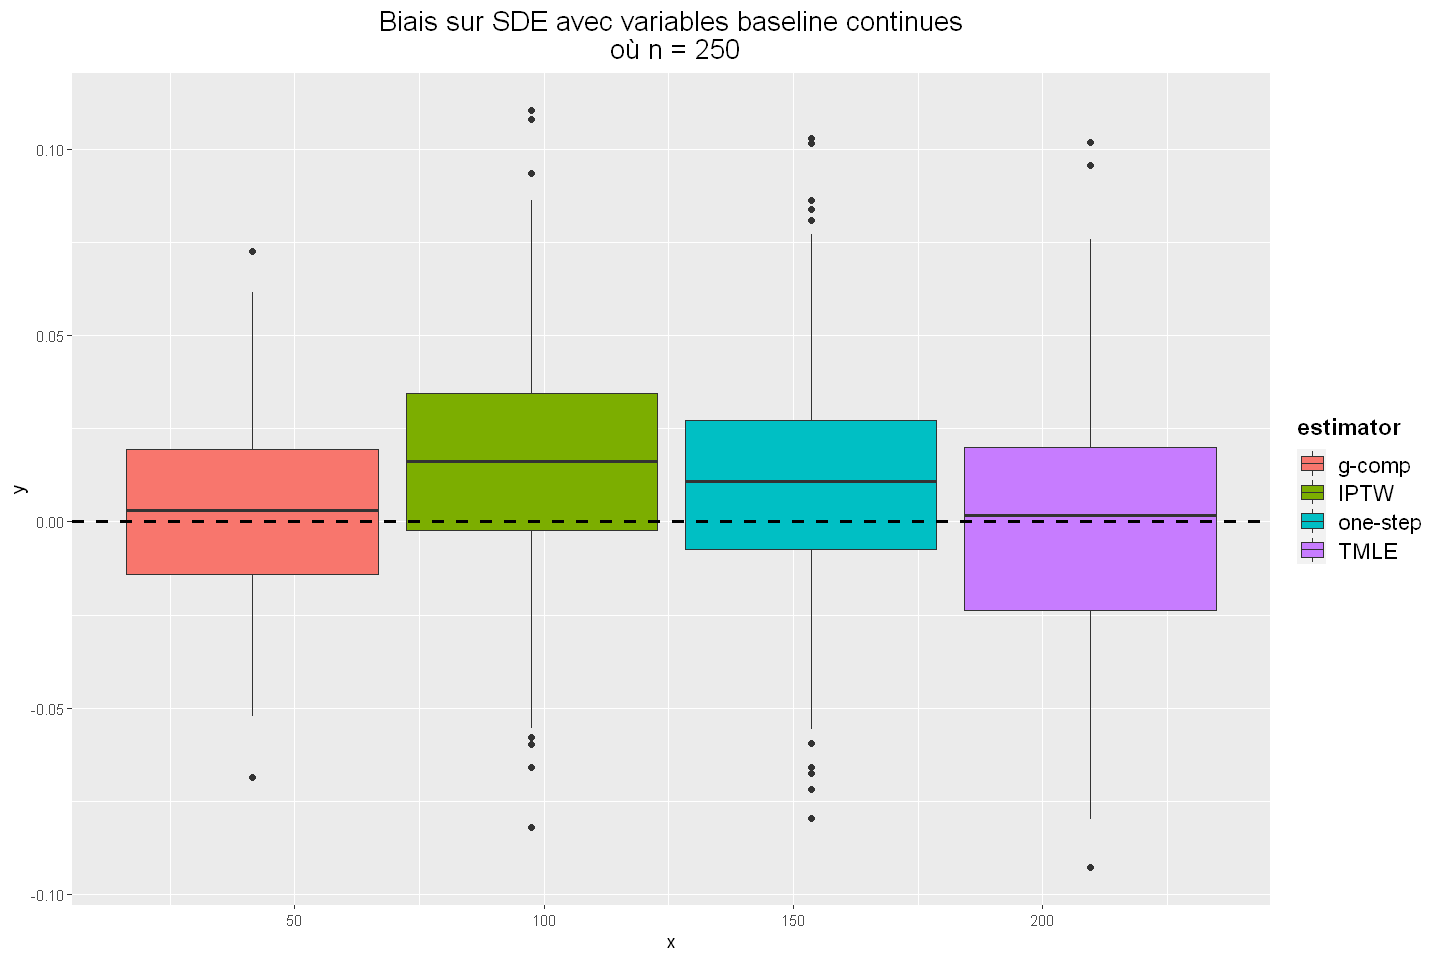

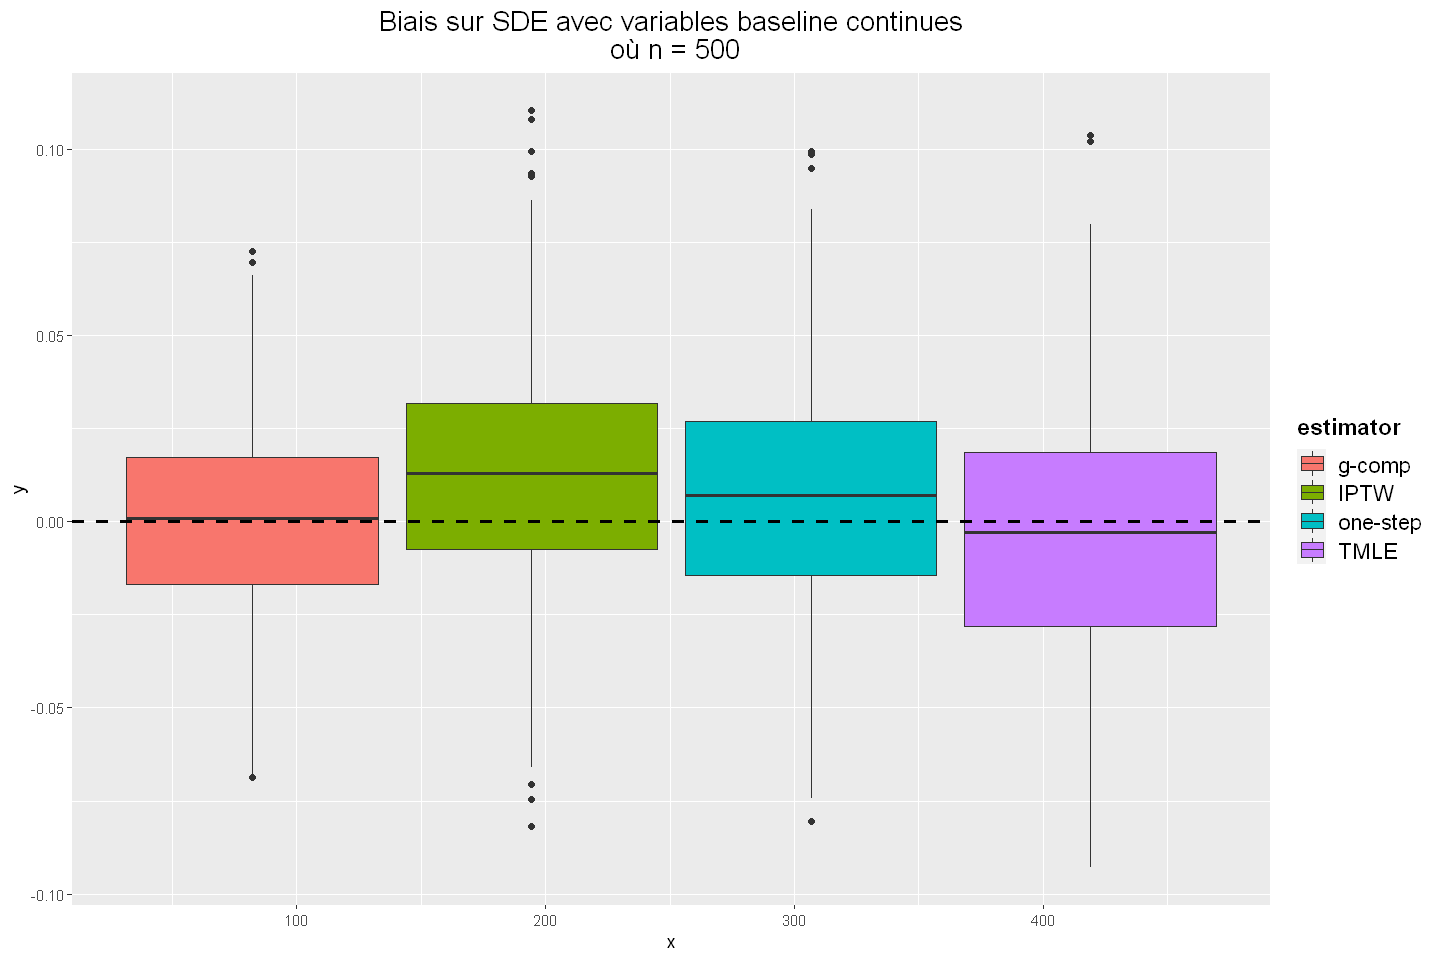

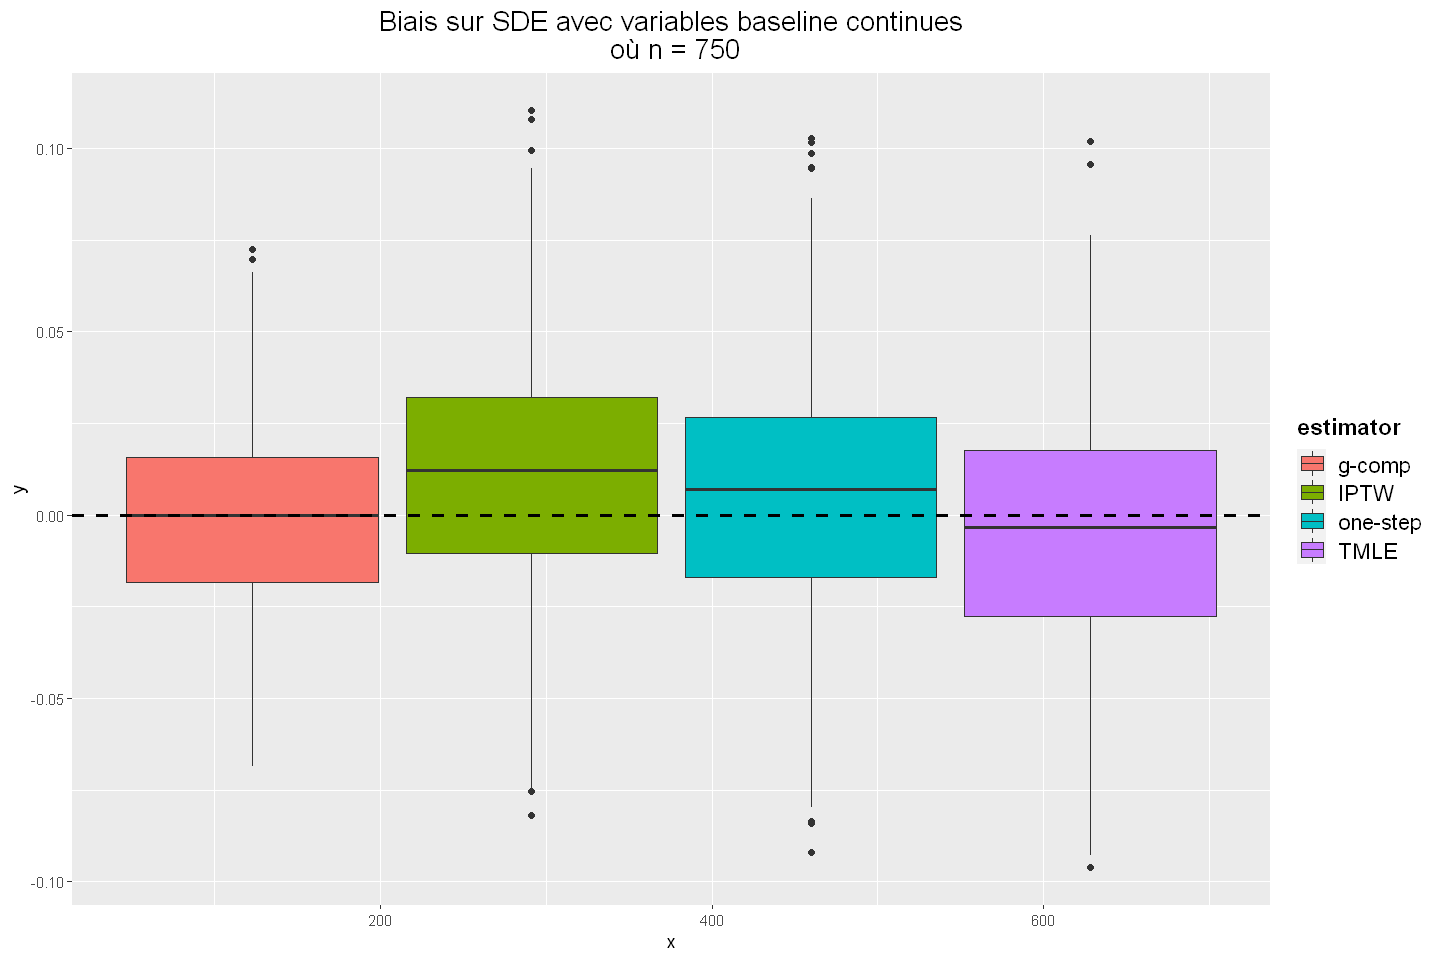

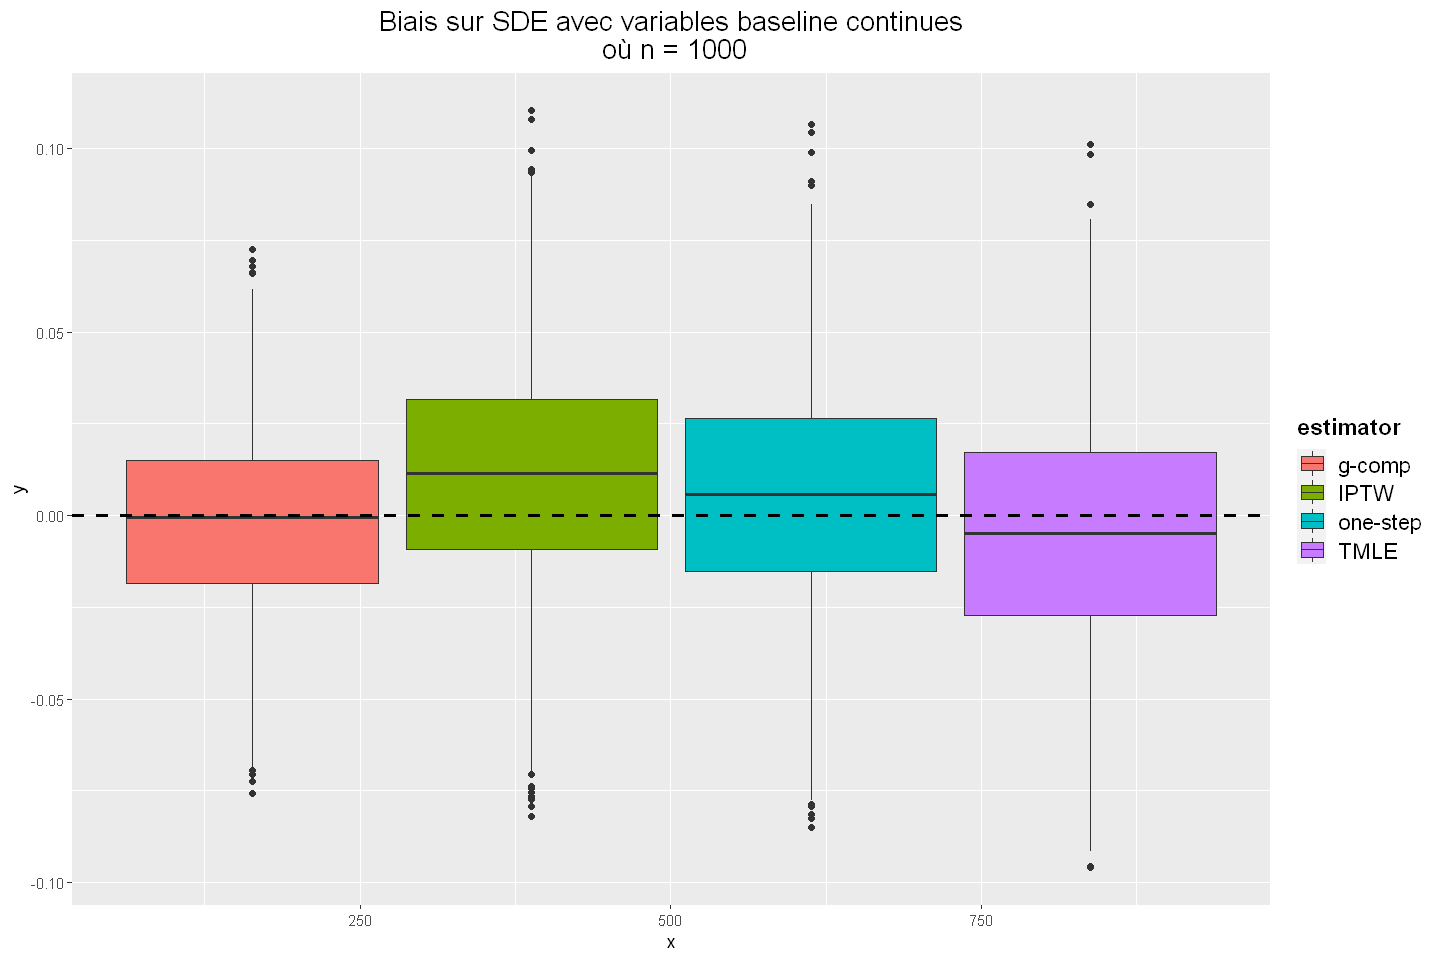

In [9]:
for (n_sim in n_sims) {
  data <- read.csv(paste0("biases_sde_quant_", n_sim, ".csv", sep = ""))
  plot_biases(data, n_sim, "SDE avec variables baseline continues\n")
}

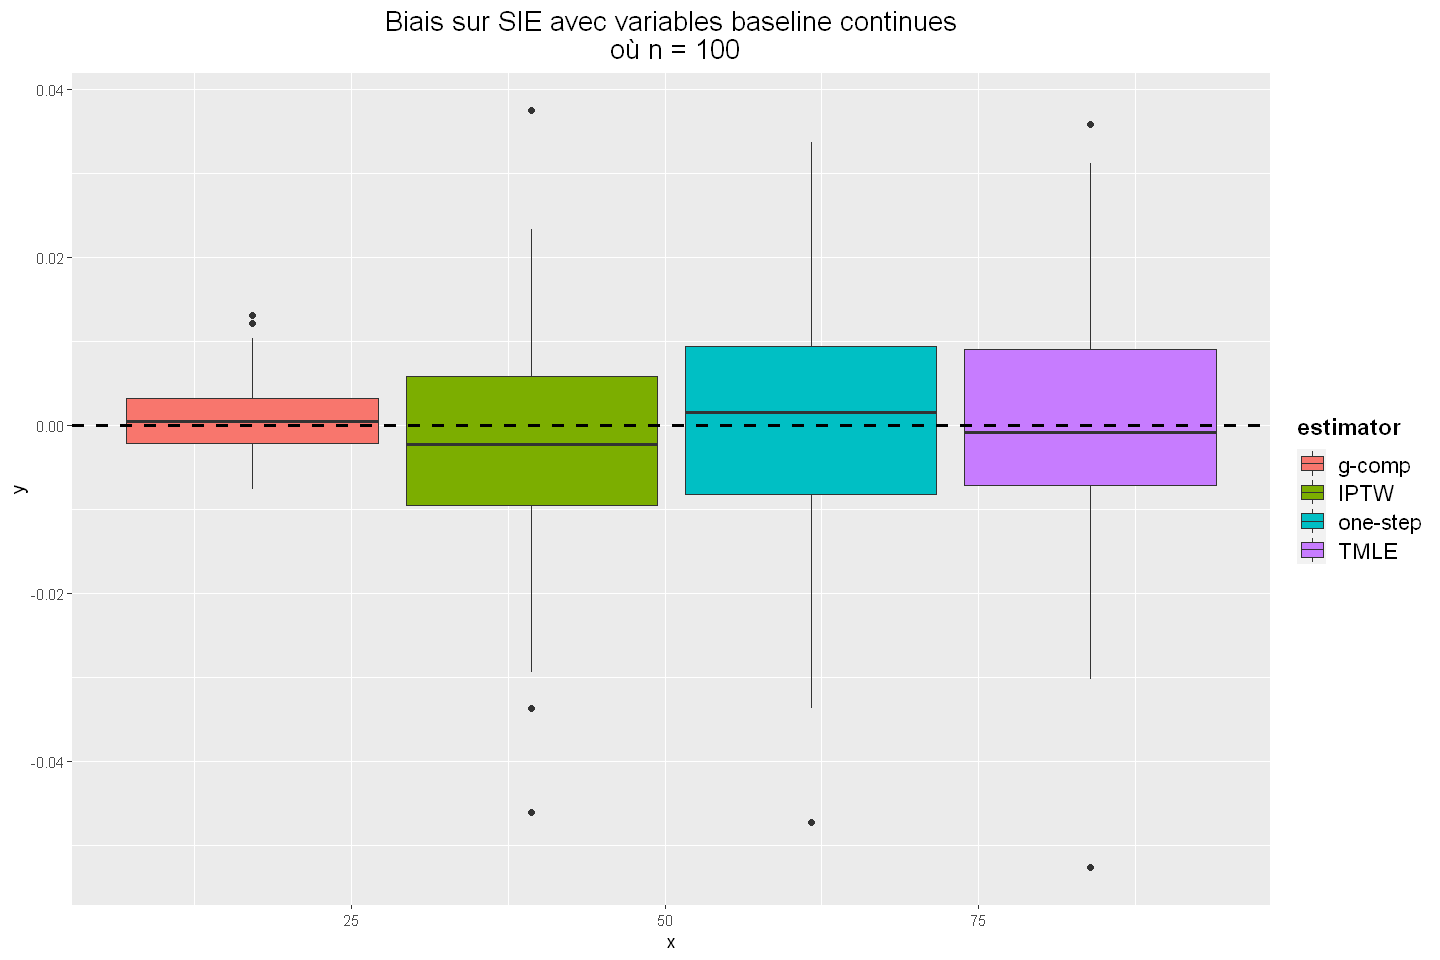

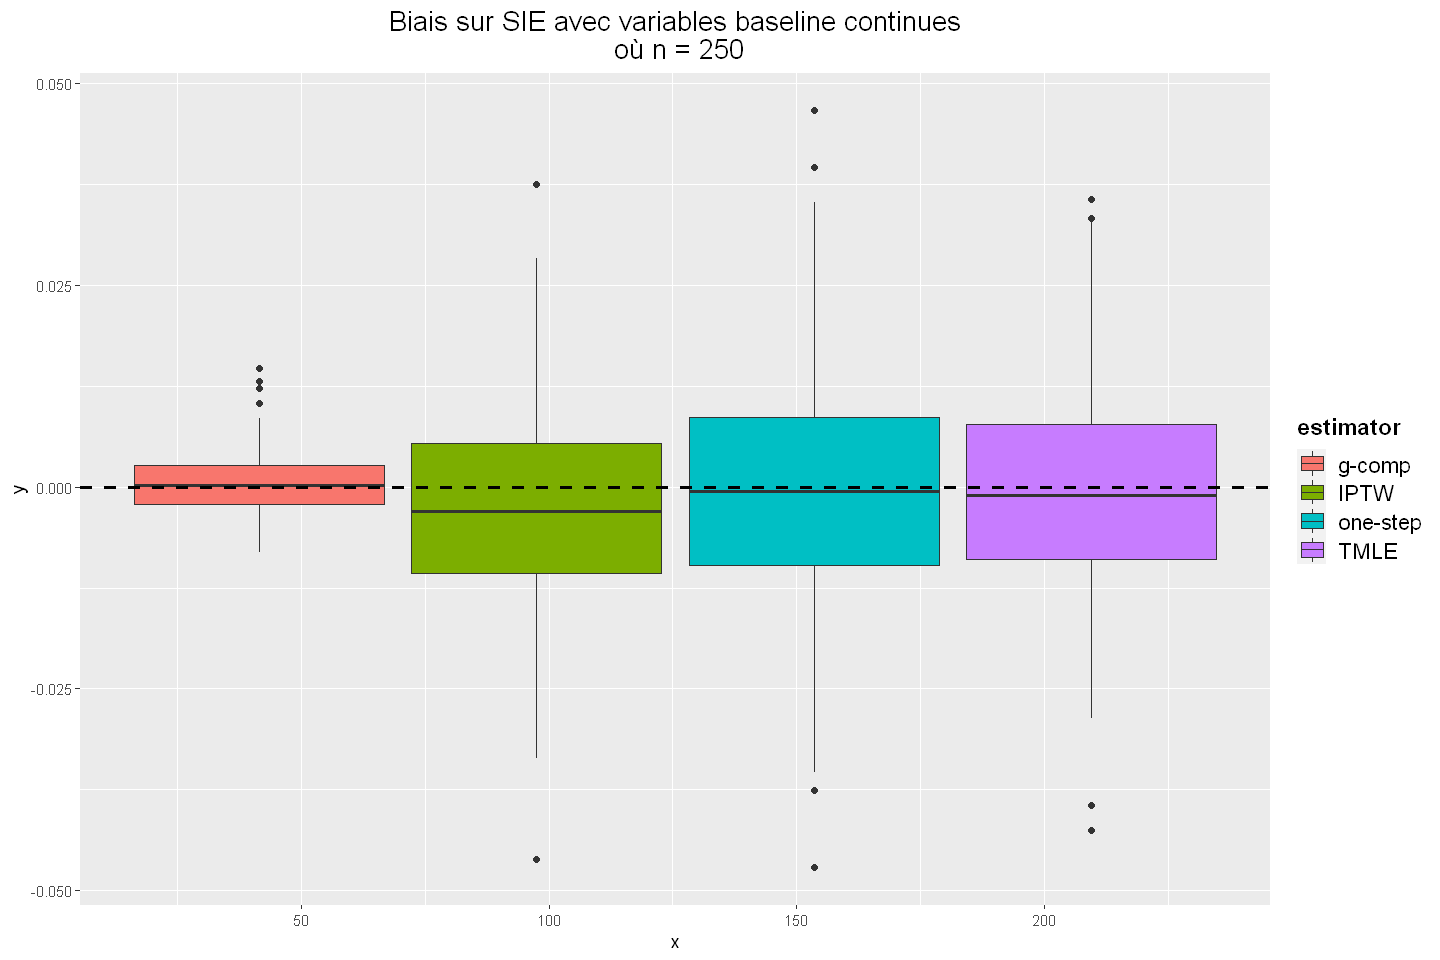

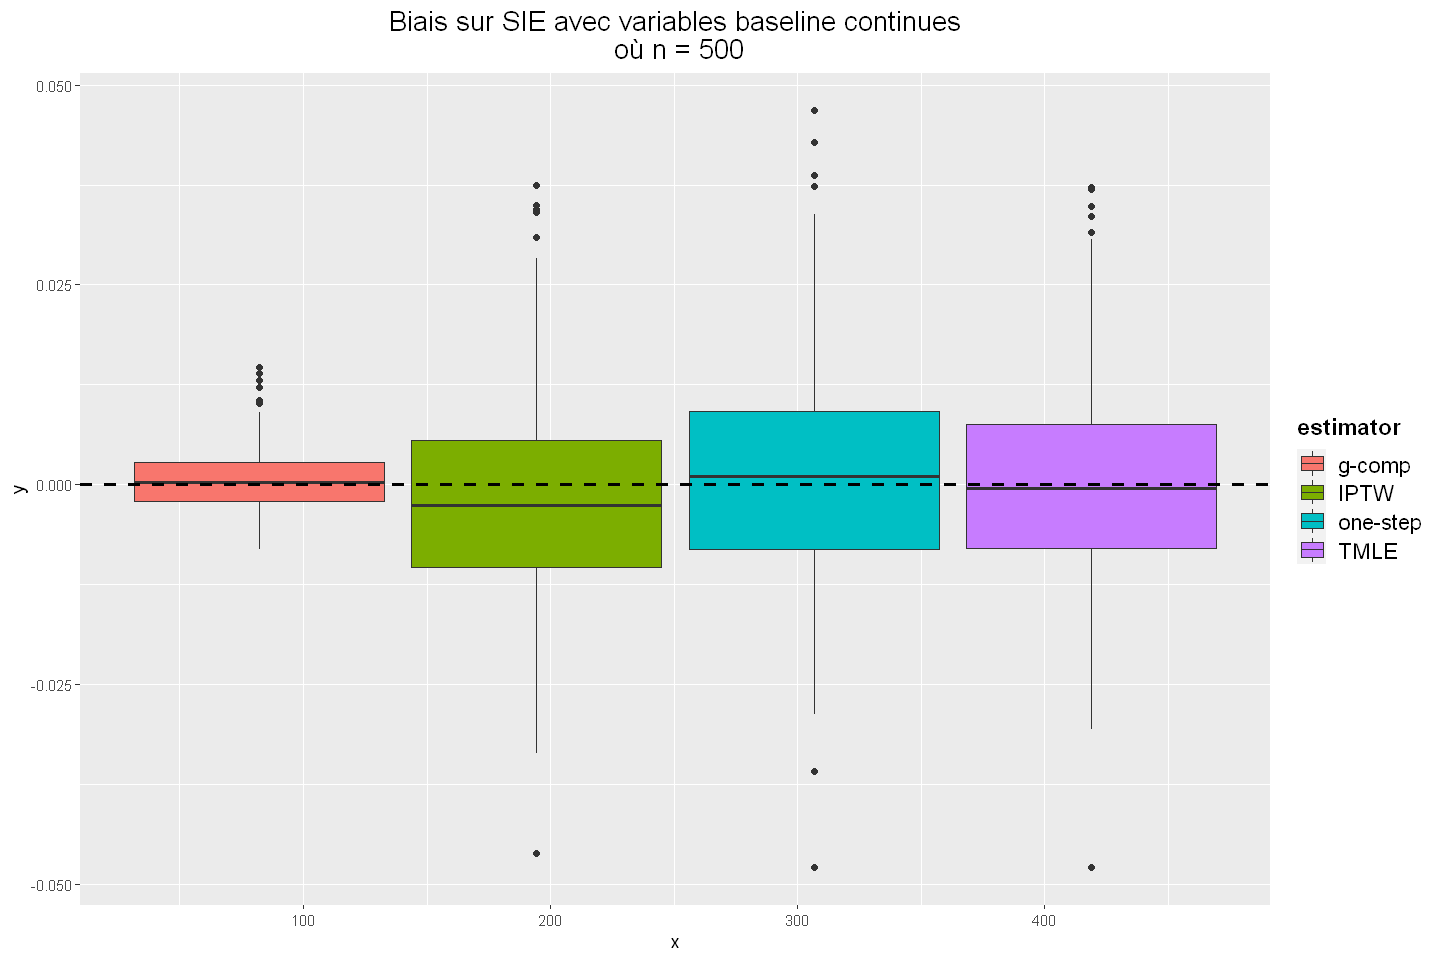

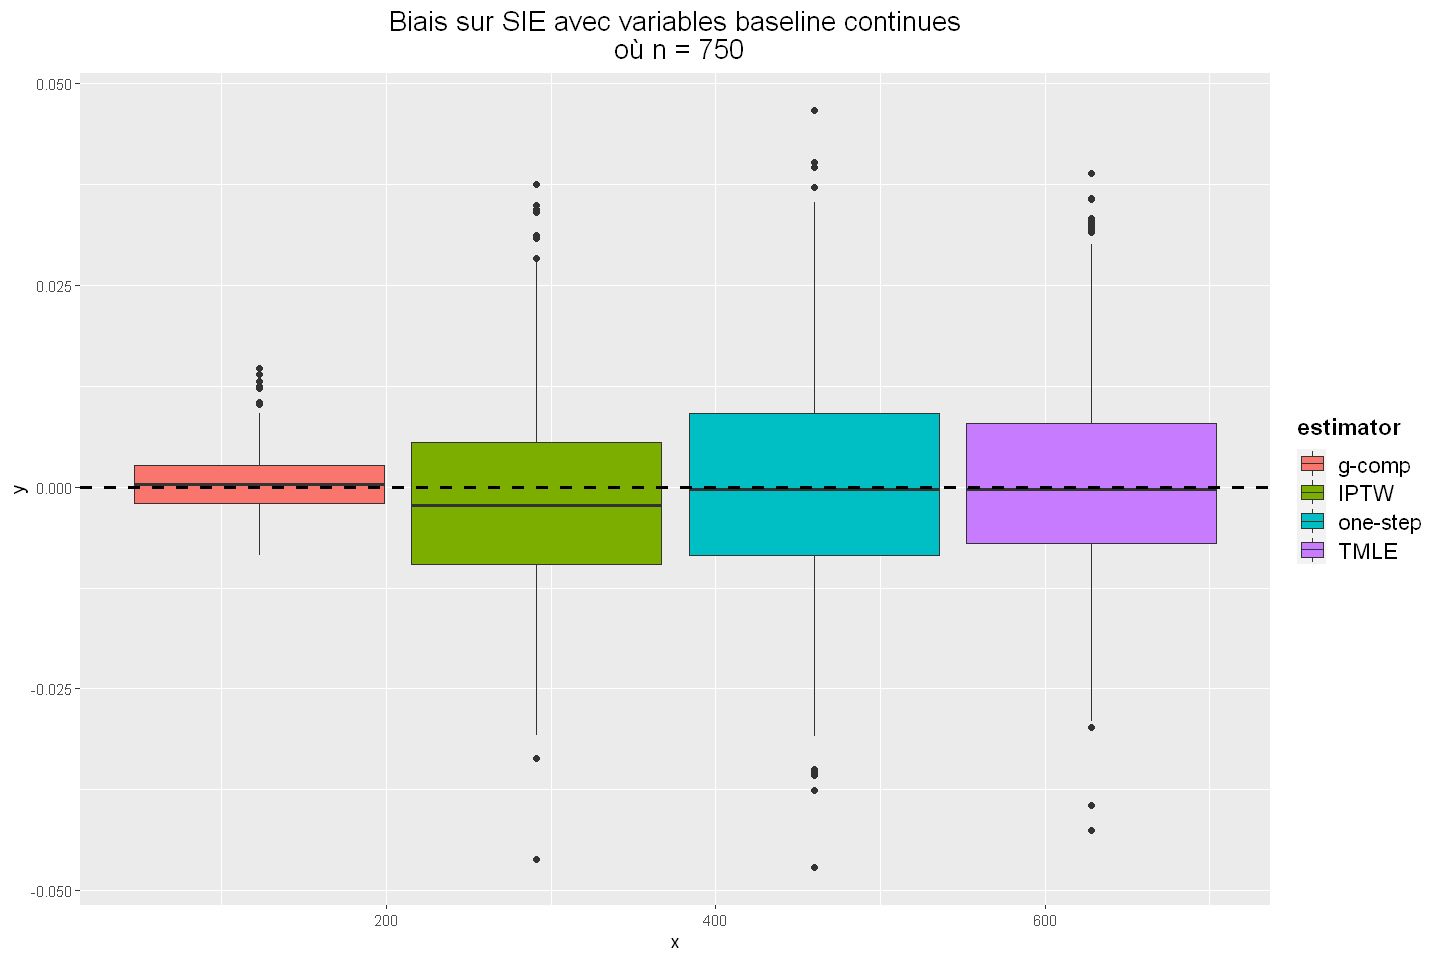

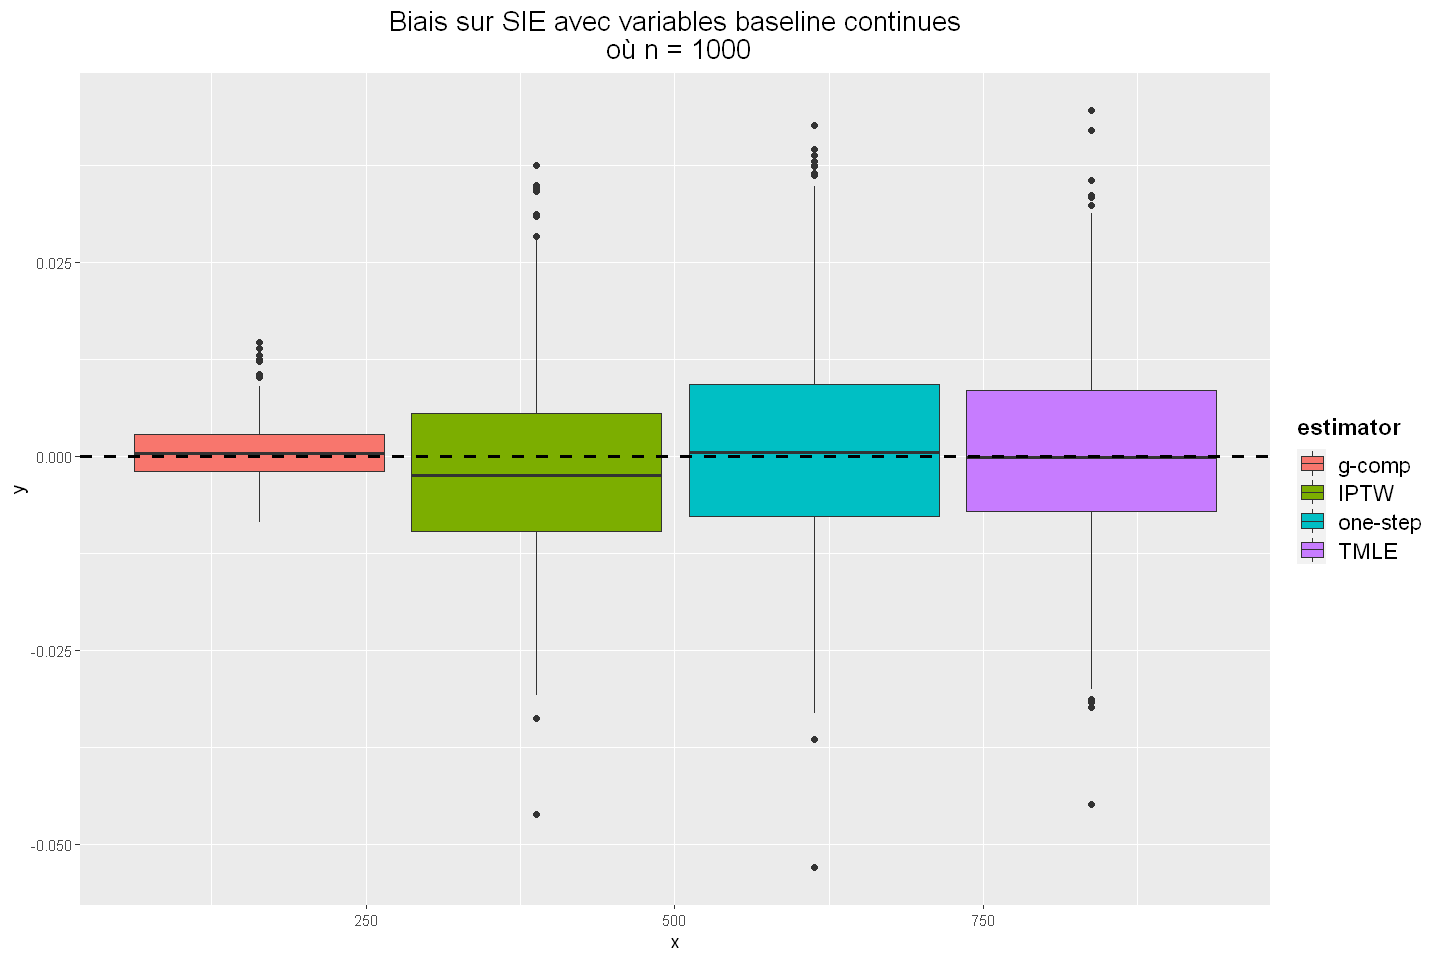

In [10]:
for (n_sim in n_sims) {
  data <- read.csv(paste0("biases_sie_quant_", n_sim, ".csv", sep = ""))
  plot_biases(data, n_sim, "SIE avec variables baseline continues\n")
}

## Modèle de Rudolph

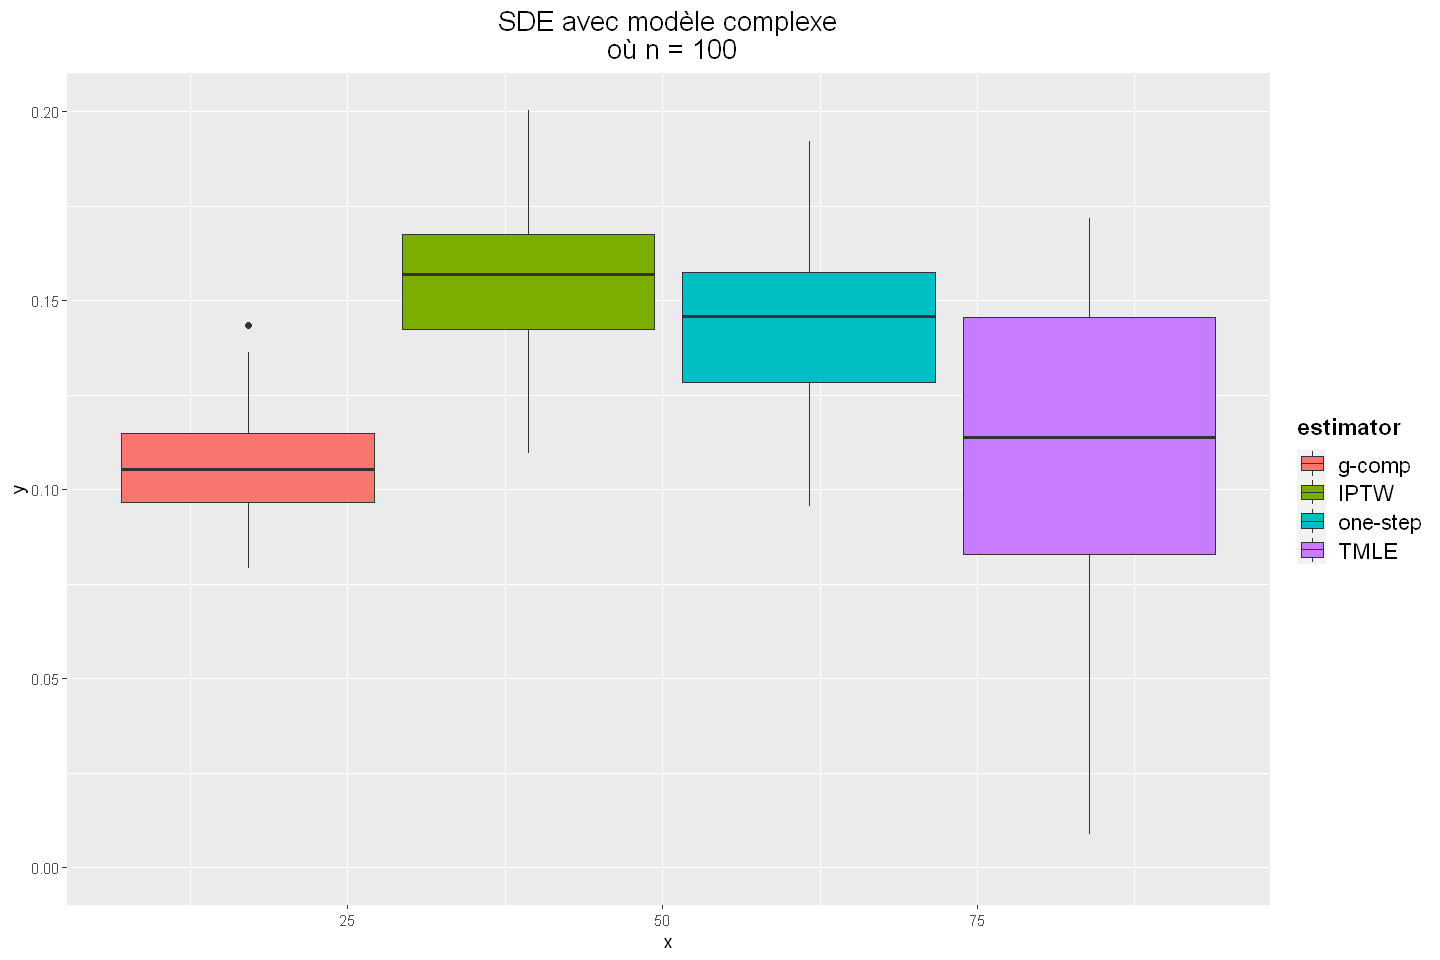

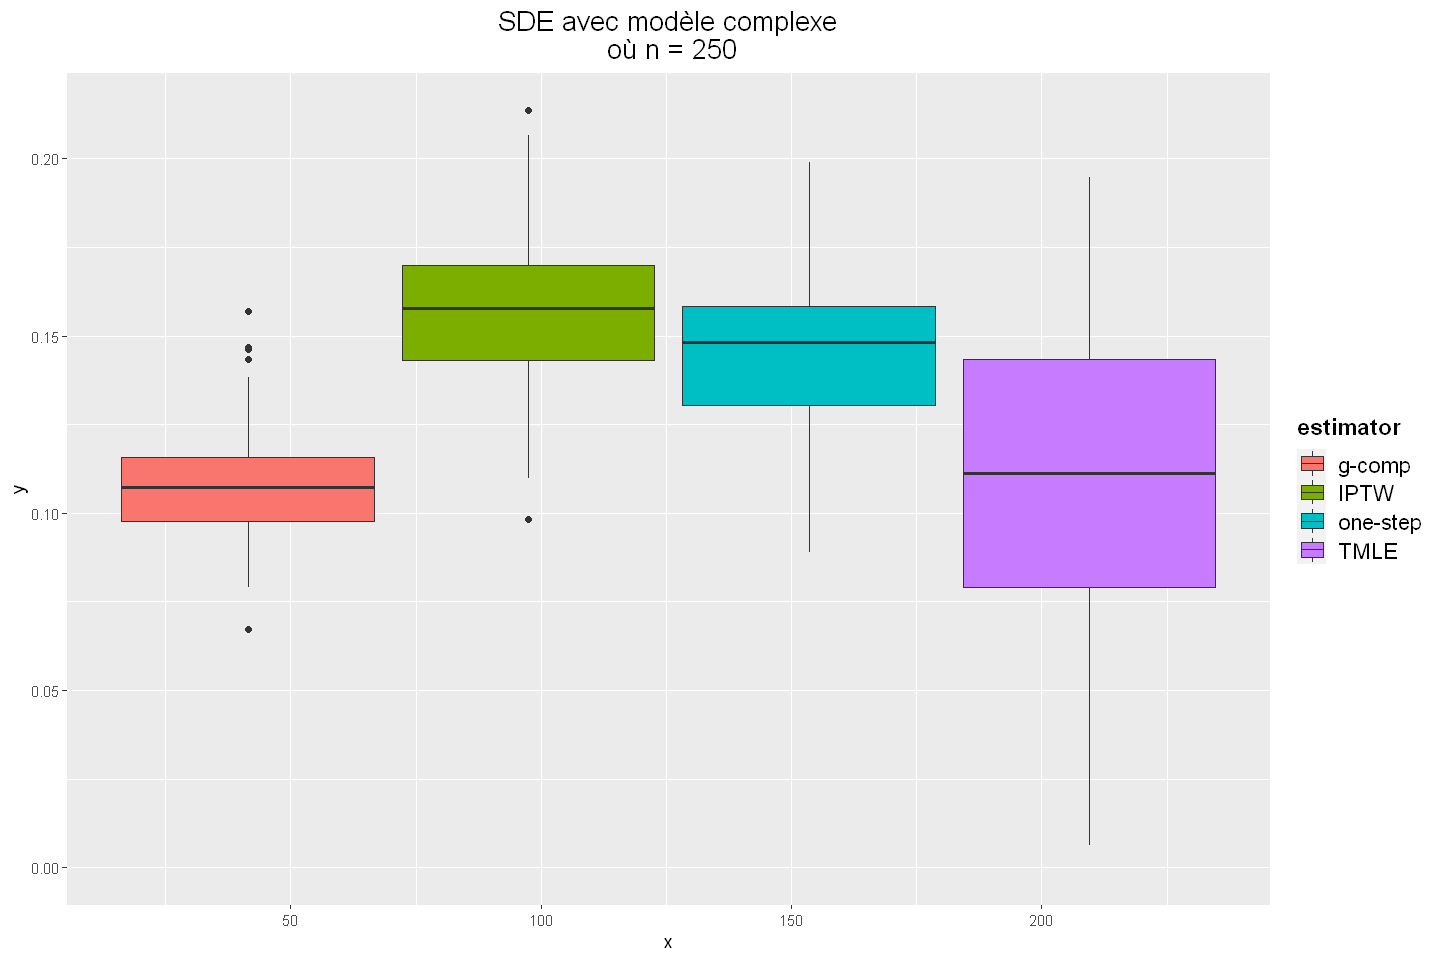

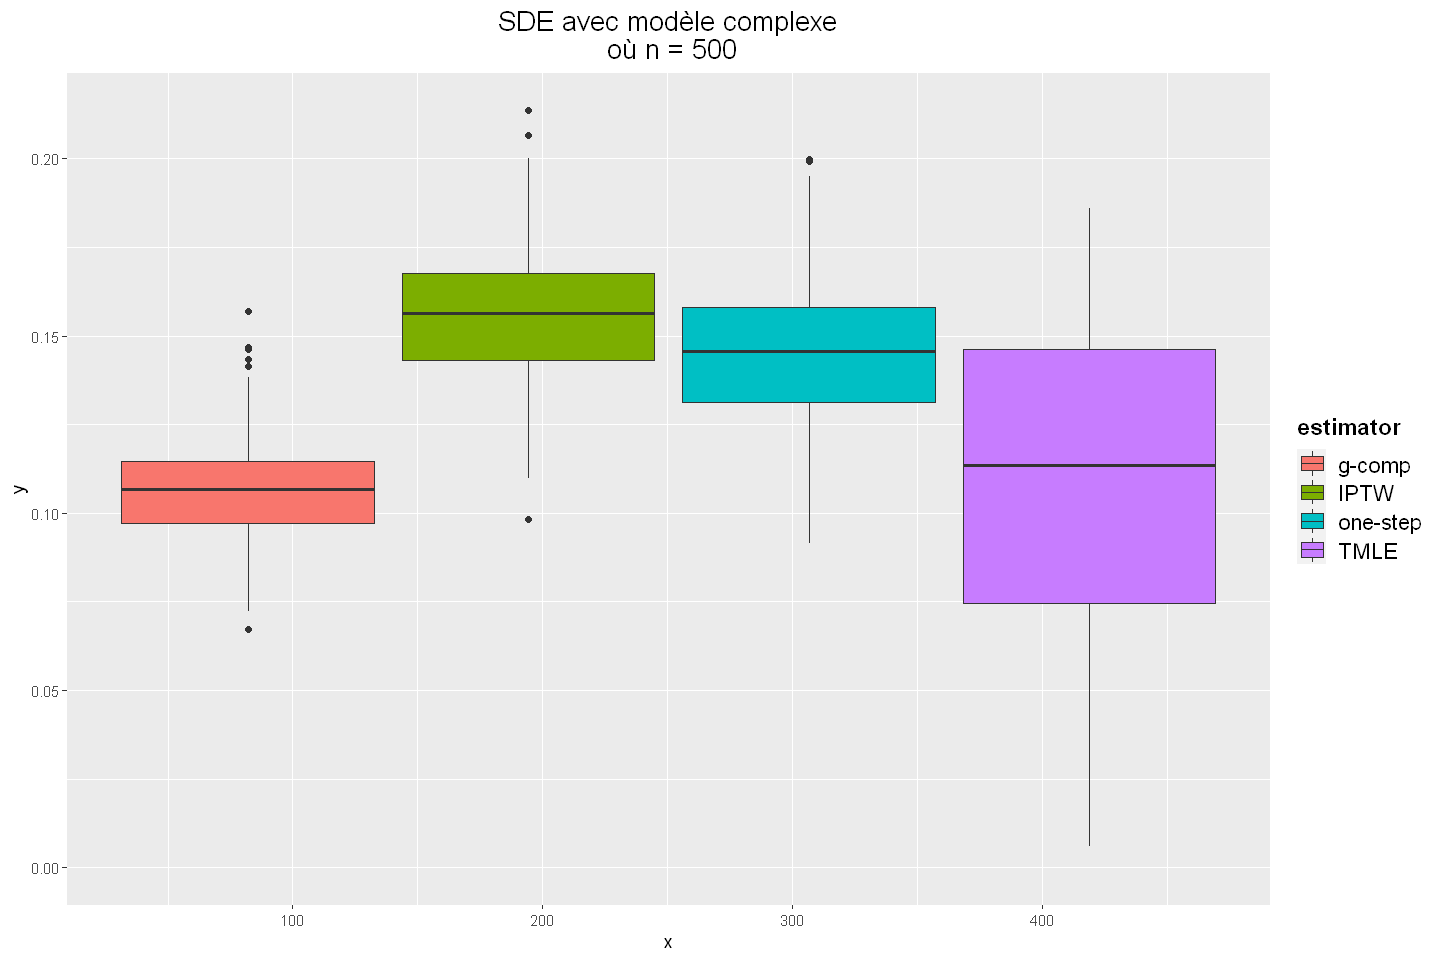

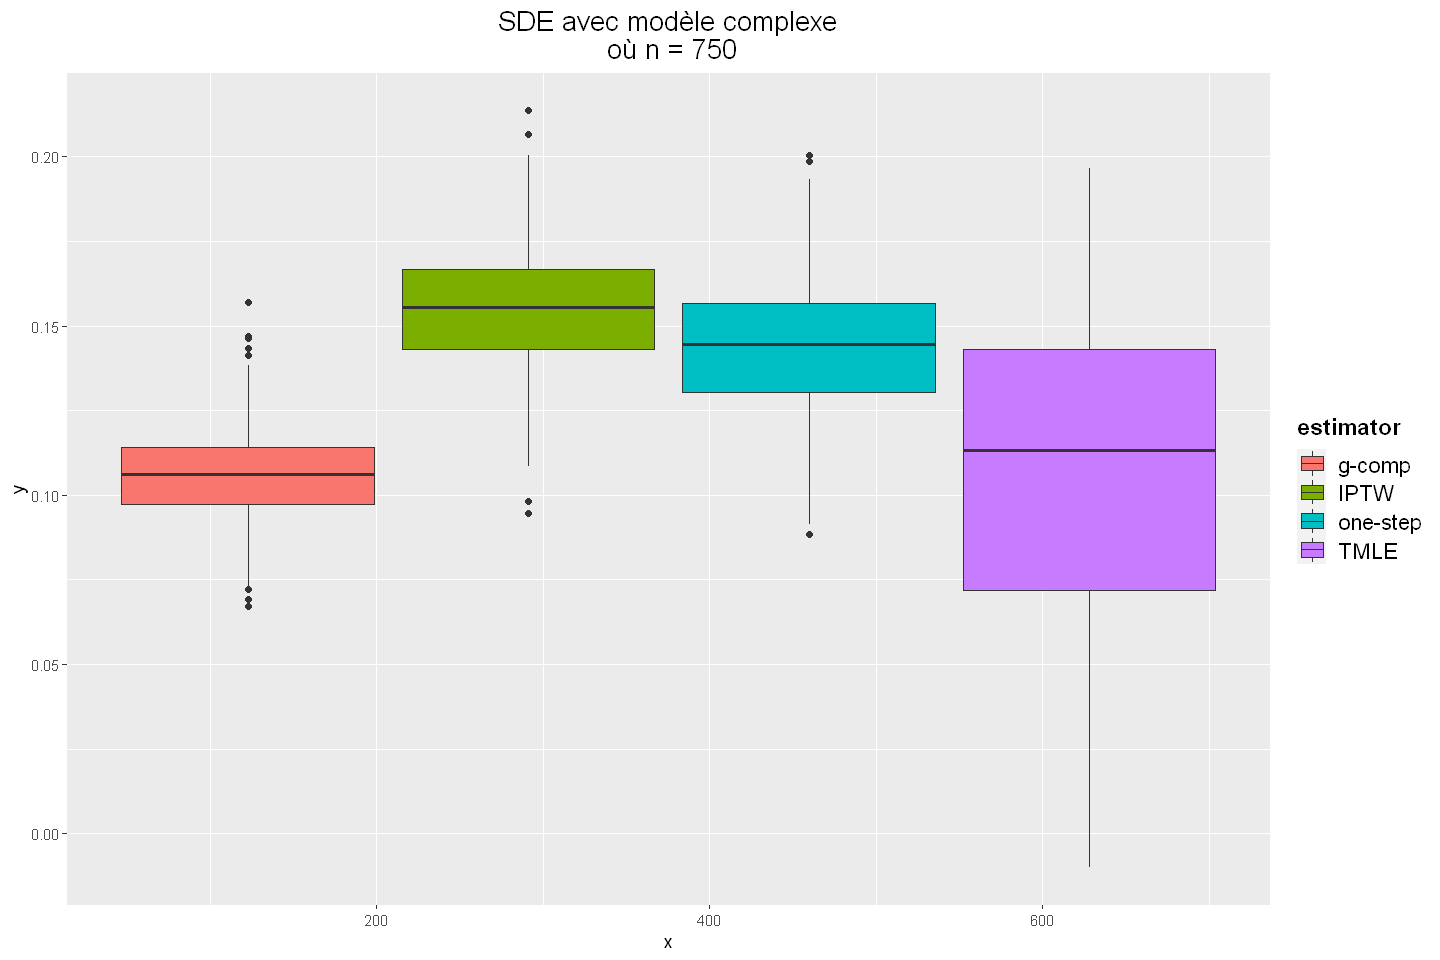

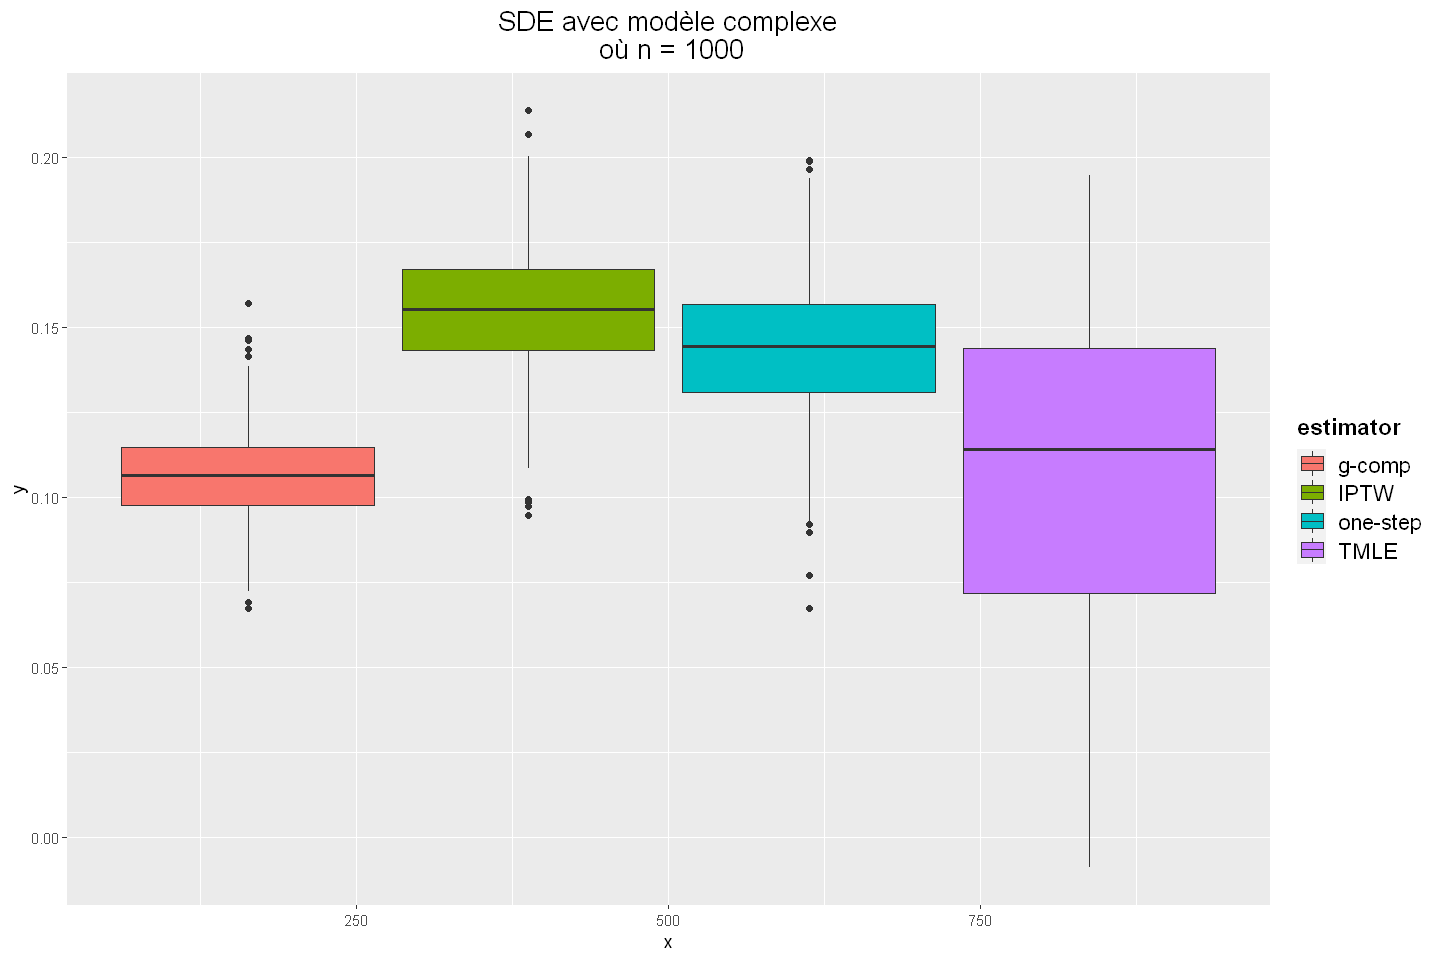

In [11]:
for (n_sim in n_sims) {
  data <- read.csv(paste0("biases_sde_rud_", n_sim, ".csv", sep = ""))
  plot_biases(data, n_sim, "SDE avec modèle complexe\n")
}

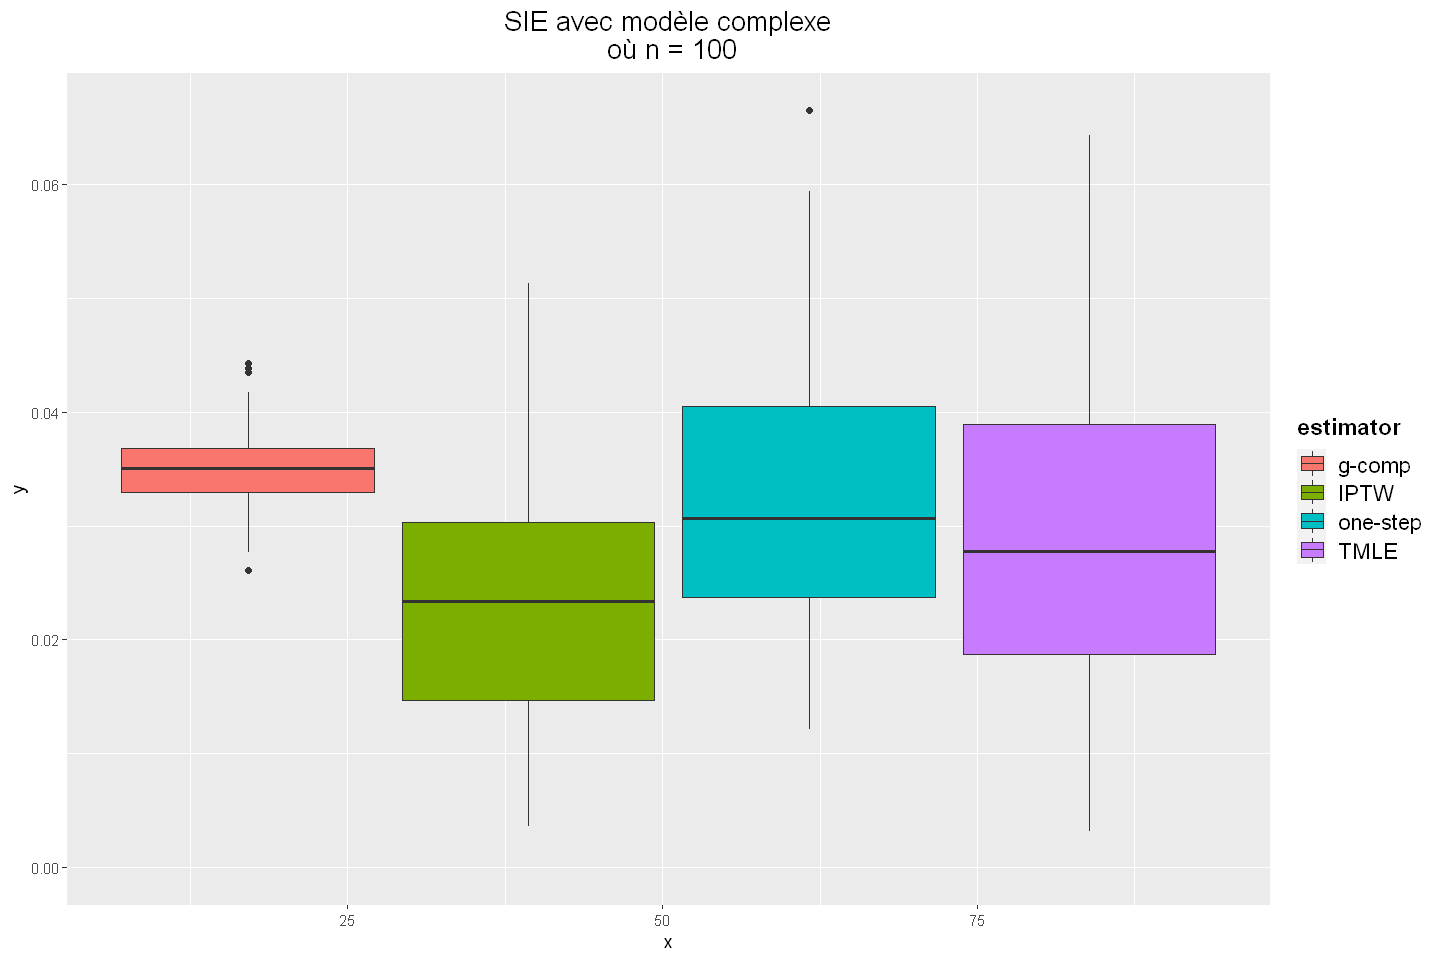

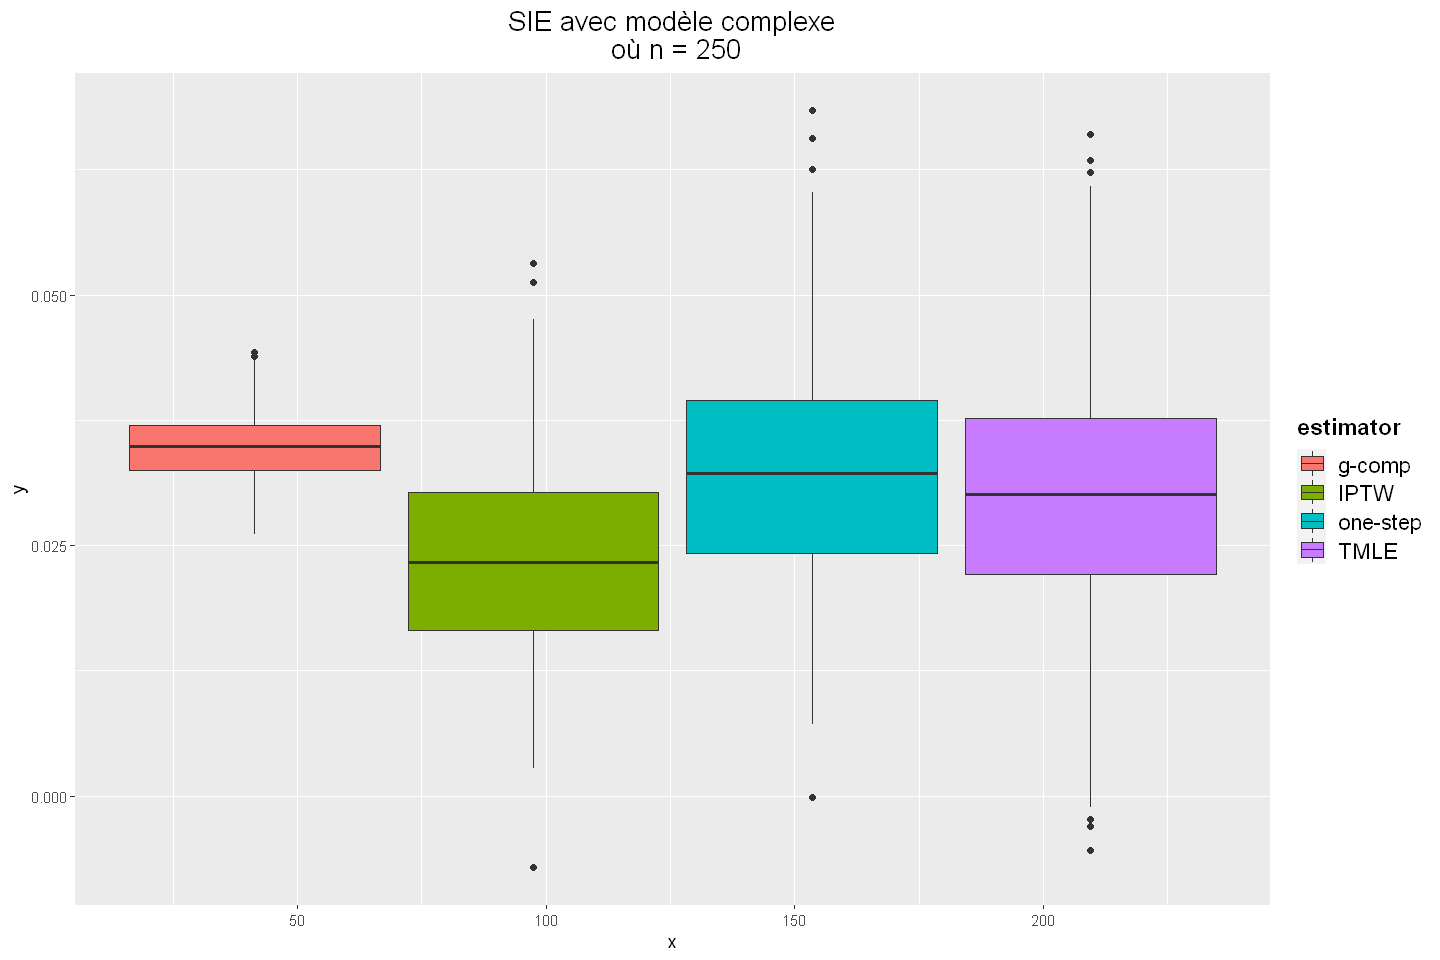

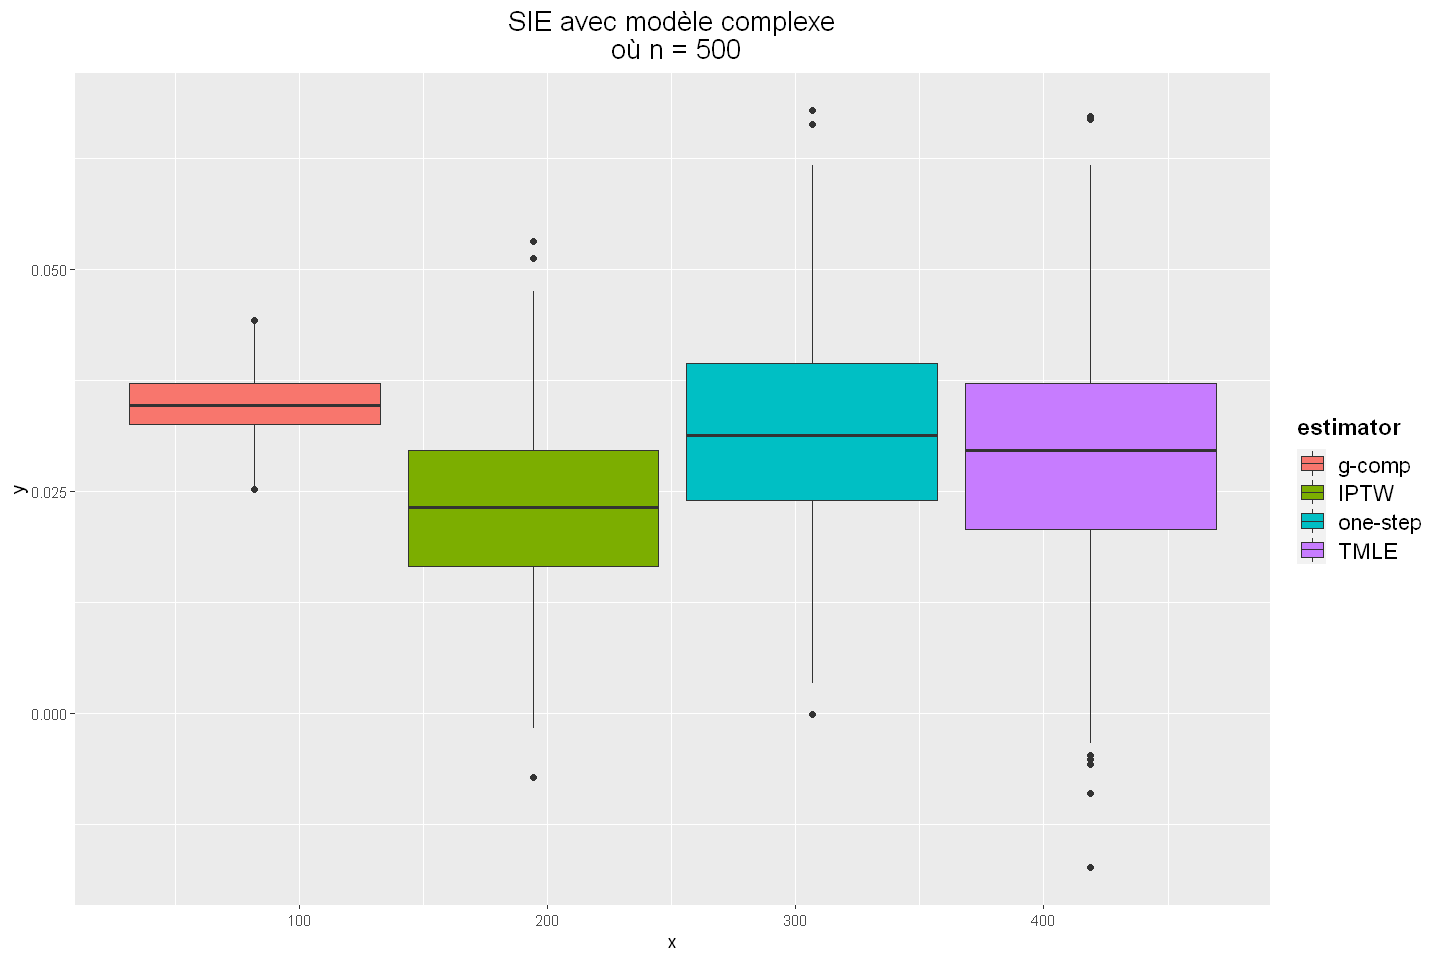

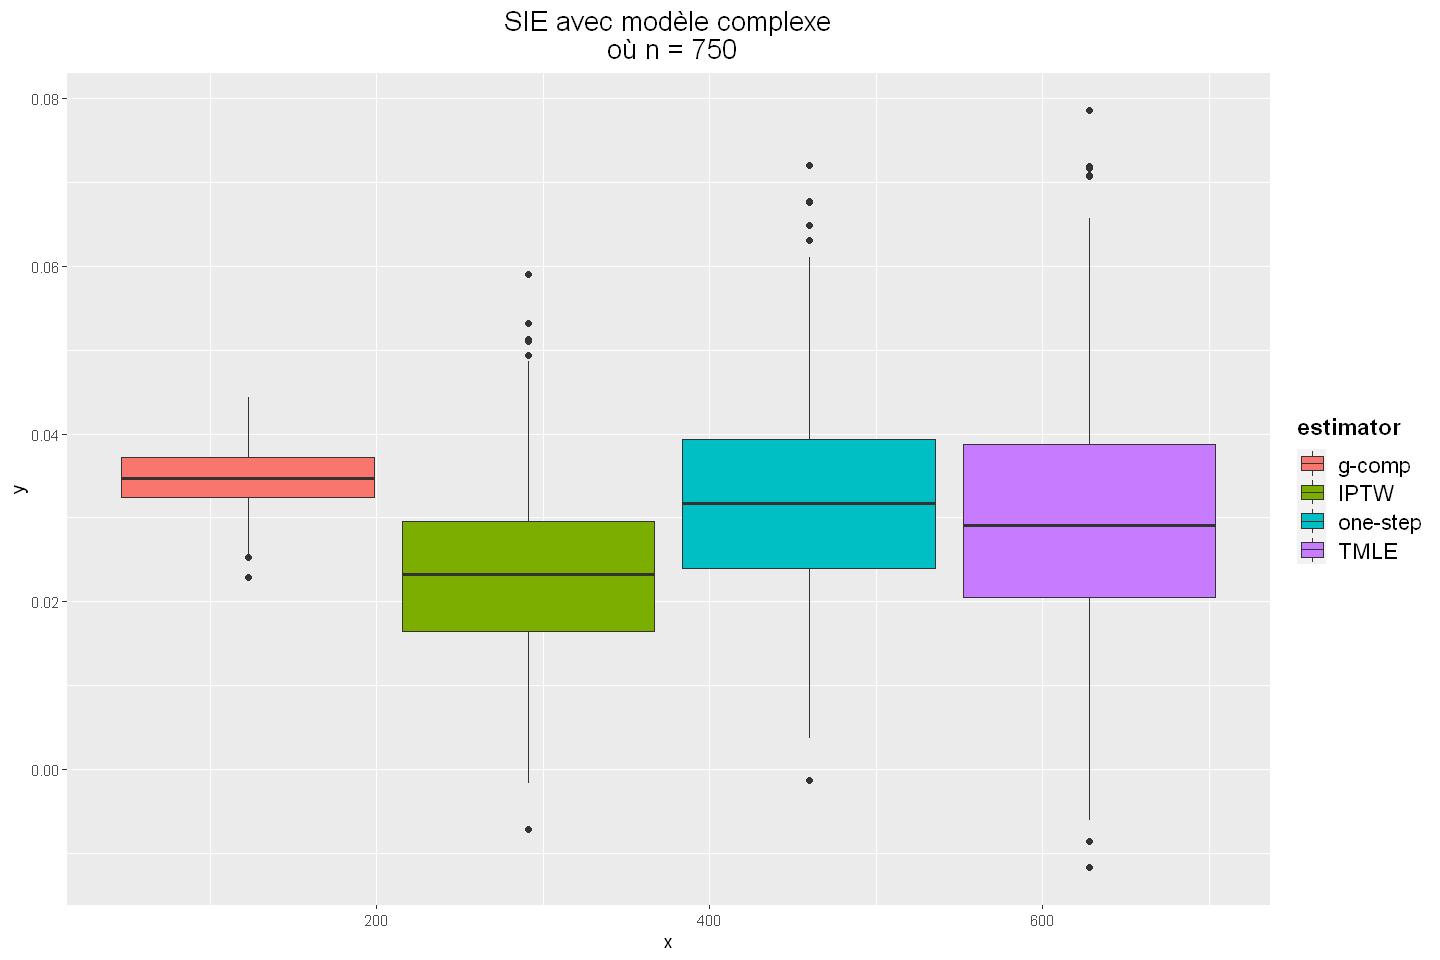

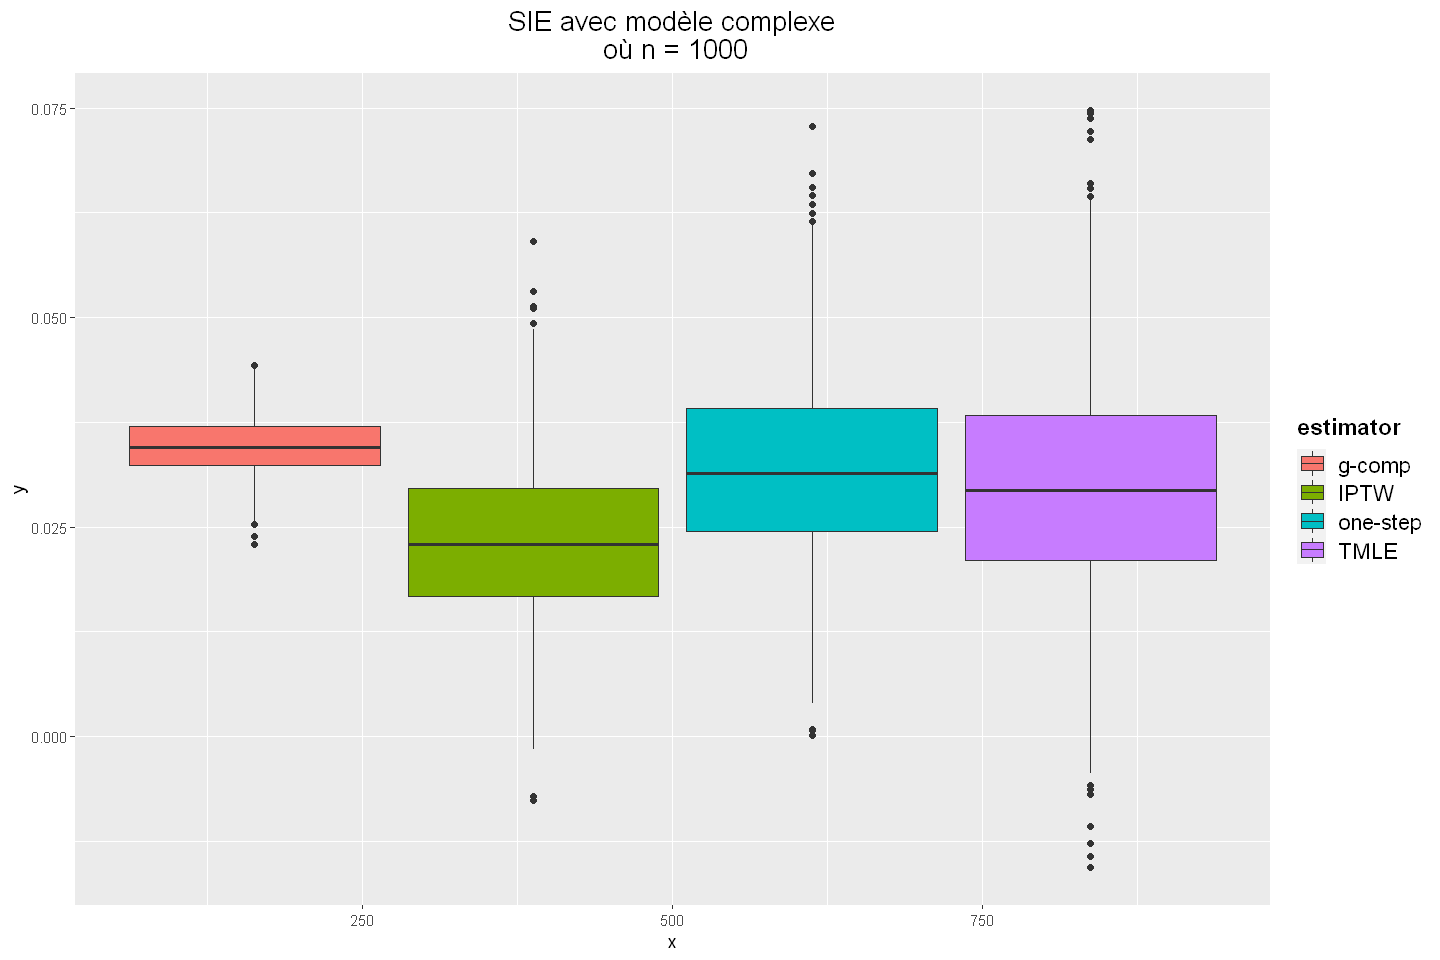

In [12]:
for (n_sim in n_sims) {
  data <- read.csv(paste0("biases_sie_rud_", n_sim, ".csv", sep = ""))
  plot_biases(data, n_sim, "SIE avec modèle complexe\n")
}

## TODO: variable de confusion continue